[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-02-store-input)

## 상가(상권)정보 분석하기
* 데이터 출처 : [공공데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)
* 소상공인 상권정보 상가업소 데이터
* 영상에 사용한 데이터셋 다운로드 : http://bit.ly/open-data-set-folder

### 데이터셋을 엑셀에서 열어보는 방법

```
MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기 
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.
 
 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다. 
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다. 
     * UTF-8의 코드 페이지 넘버는 65001입니다.
 
   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다. 
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.  
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택   
  
``` 

### 데이터셋 분류 지역
* 이 튜토리얼에서는 1번 파일만 사용합니다.

```
※ 파일데이터 분류 지역 
1 : 서울, 부산
2 : 대구, 인천, 광주, 대전, 울산
3 : 경기, 강원, 충북
4 : 충남, 전북, 전남, 경북, 경남, 제주
```

## 라이브러리 로드

In [1]:
# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정

In [2]:
# 한글폰트를 설정합니다.
plt.rc("axes", unicode_minus=False)

In [43]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'D2Coding' in f.name]
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  
                    # ex - 'C:/asiahead4.ttf'
fontprop = fm.FontProperties(fname=font_location)
font_name = fontprop.get_name()
plt.rcParams["font.family"] = font_name


In [48]:
plt.rc("font" , family=font_name, size= 14)

In [368]:
import matplotlib
matplotlib.get_cachedir()

'/home/jovyan/.cache/matplotlib'

In [369]:
matplotlib.matplotlib_fname()

'/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [49]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


### 한글폰트 설정 확인

<AxesSubplot:title={'center':'한글폰트 설정'}>

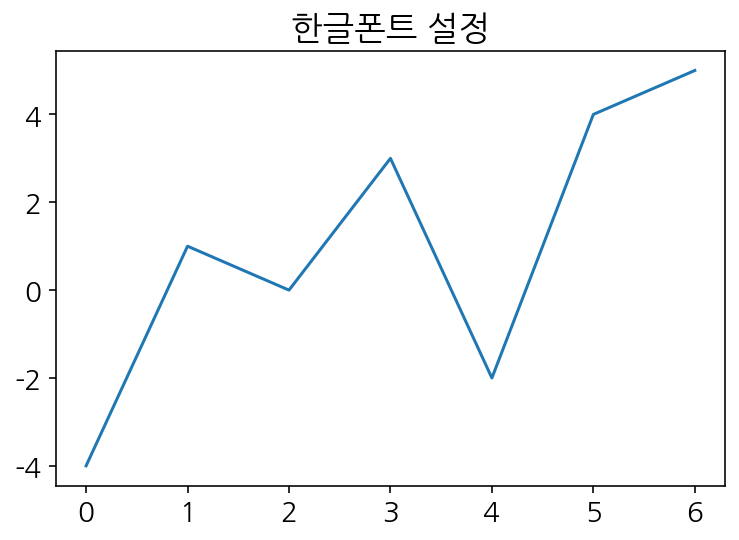

In [50]:
pd.Series([-4, 1, 0, 3, -2, 4, 5]).plot(title="한글폰트 설정")

## 파일로드

In [36]:
%ls data

'전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv'
 상가업소정보_201912_01.csv
'주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'
 seoul_municipalities_geo_simple.json


In [37]:
# 파일을 로드합니다.
df =pd.read_csv("data/상가업소정보_201912_01.csv", sep='|')
df.shapepe

AttributeError: 'DataFrame' object has no attribute 'shapepe'

In [ ]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39

## 미리보기

### head, tail

In [ ]:
# head 로 미리보기를 합니다.
df.head(5)

In [ ]:
# tail 로 미리보기를 합니다.
df.tail(5)


### 인덱스 정보 보기

In [ ]:
df.index

### 컬럼명만 보기

In [ ]:
# 컬럼값만 보기
df.columns

### info

In [ ]:
# info 로 데이터프레임의 정보보기
df.info()

### 데이터 타입 보기

In [ ]:
df.dtypes

## 결측치 확인하기

In [ ]:
1 == True

In [ ]:
# 결측치를 구해서 n 이라는 변수에 담고 재사용 합니다.
n = df.isnull().sum()
n

### 결측치 시각화

<AxesSubplot:>

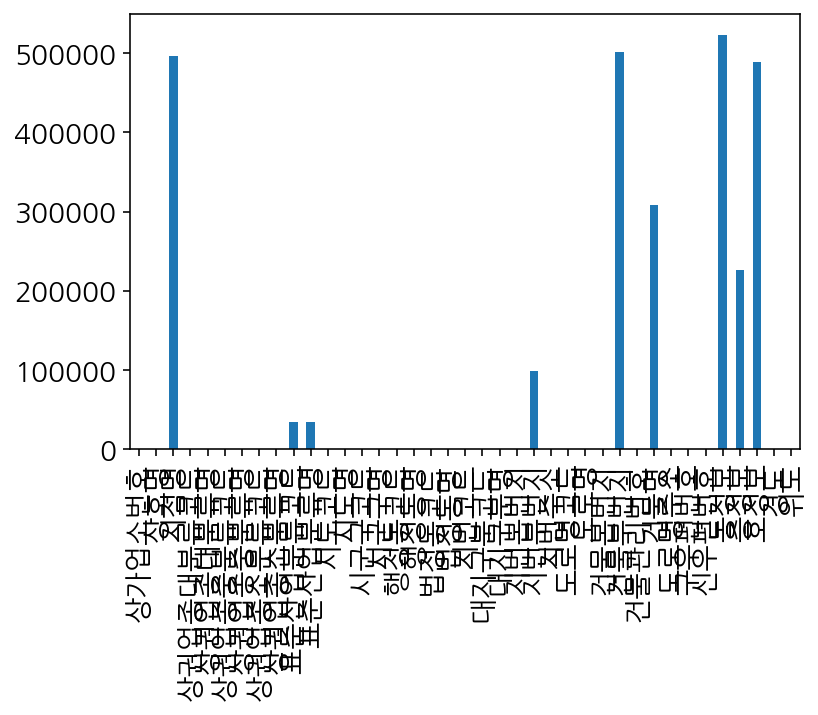

In [51]:
# 막대그래프로 시각화 합니다.
n.plot.bar()

<AxesSubplot:>

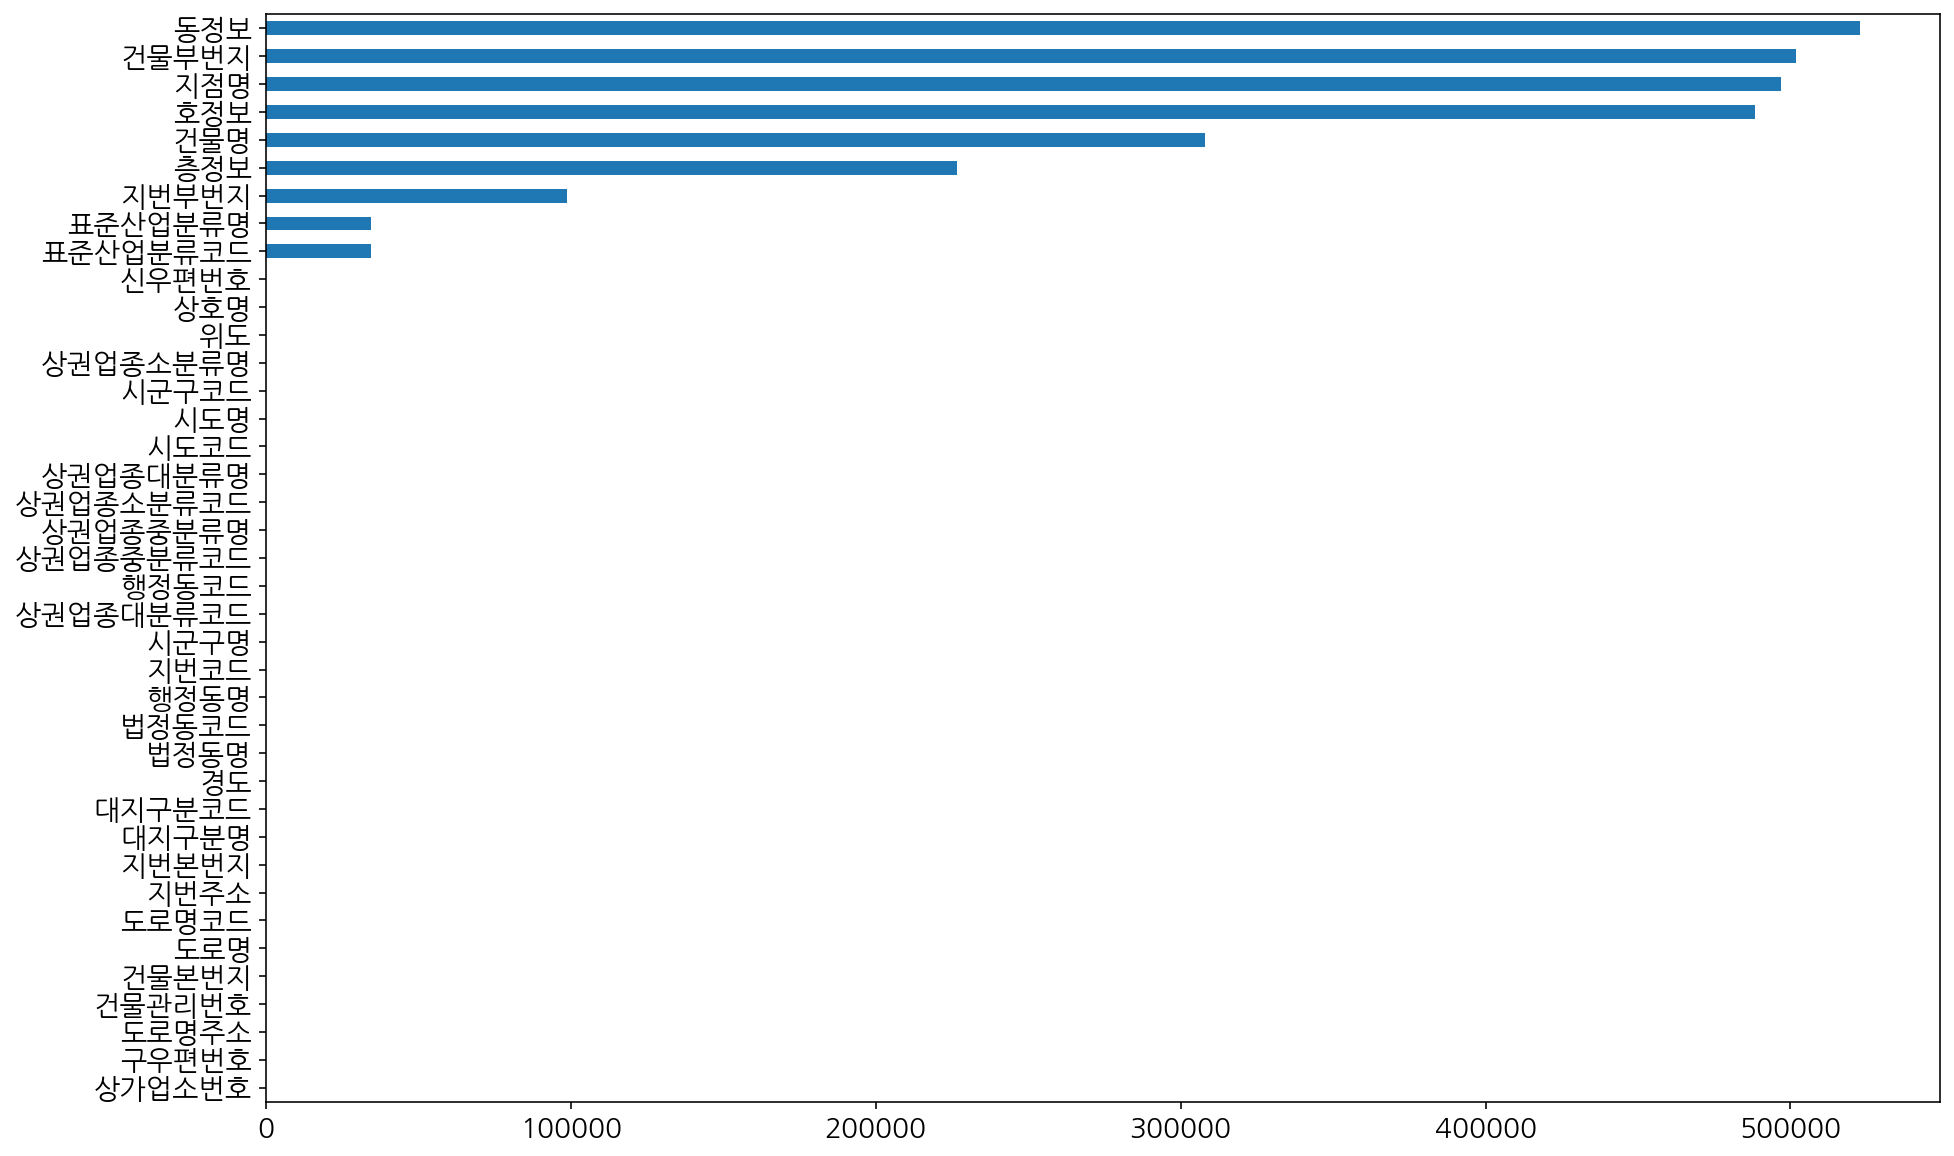

In [54]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그립니다.

n.sort_values().plot.barh(figsize=(15,10))

### missingno 로 결측치 시각화 하기
* 별도의 설치가 필요한 라이브러리 입니다.
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 아나콘다에서 설치(다음 3가지 중 하나의 명령어를 사용)
    + conda install -c conda-forge missingno
    + conda install -c conda-forge/label/gcc7 missingno
    + conda install -c conda-forge/label/cf201901 missingno

<AxesSubplot:>

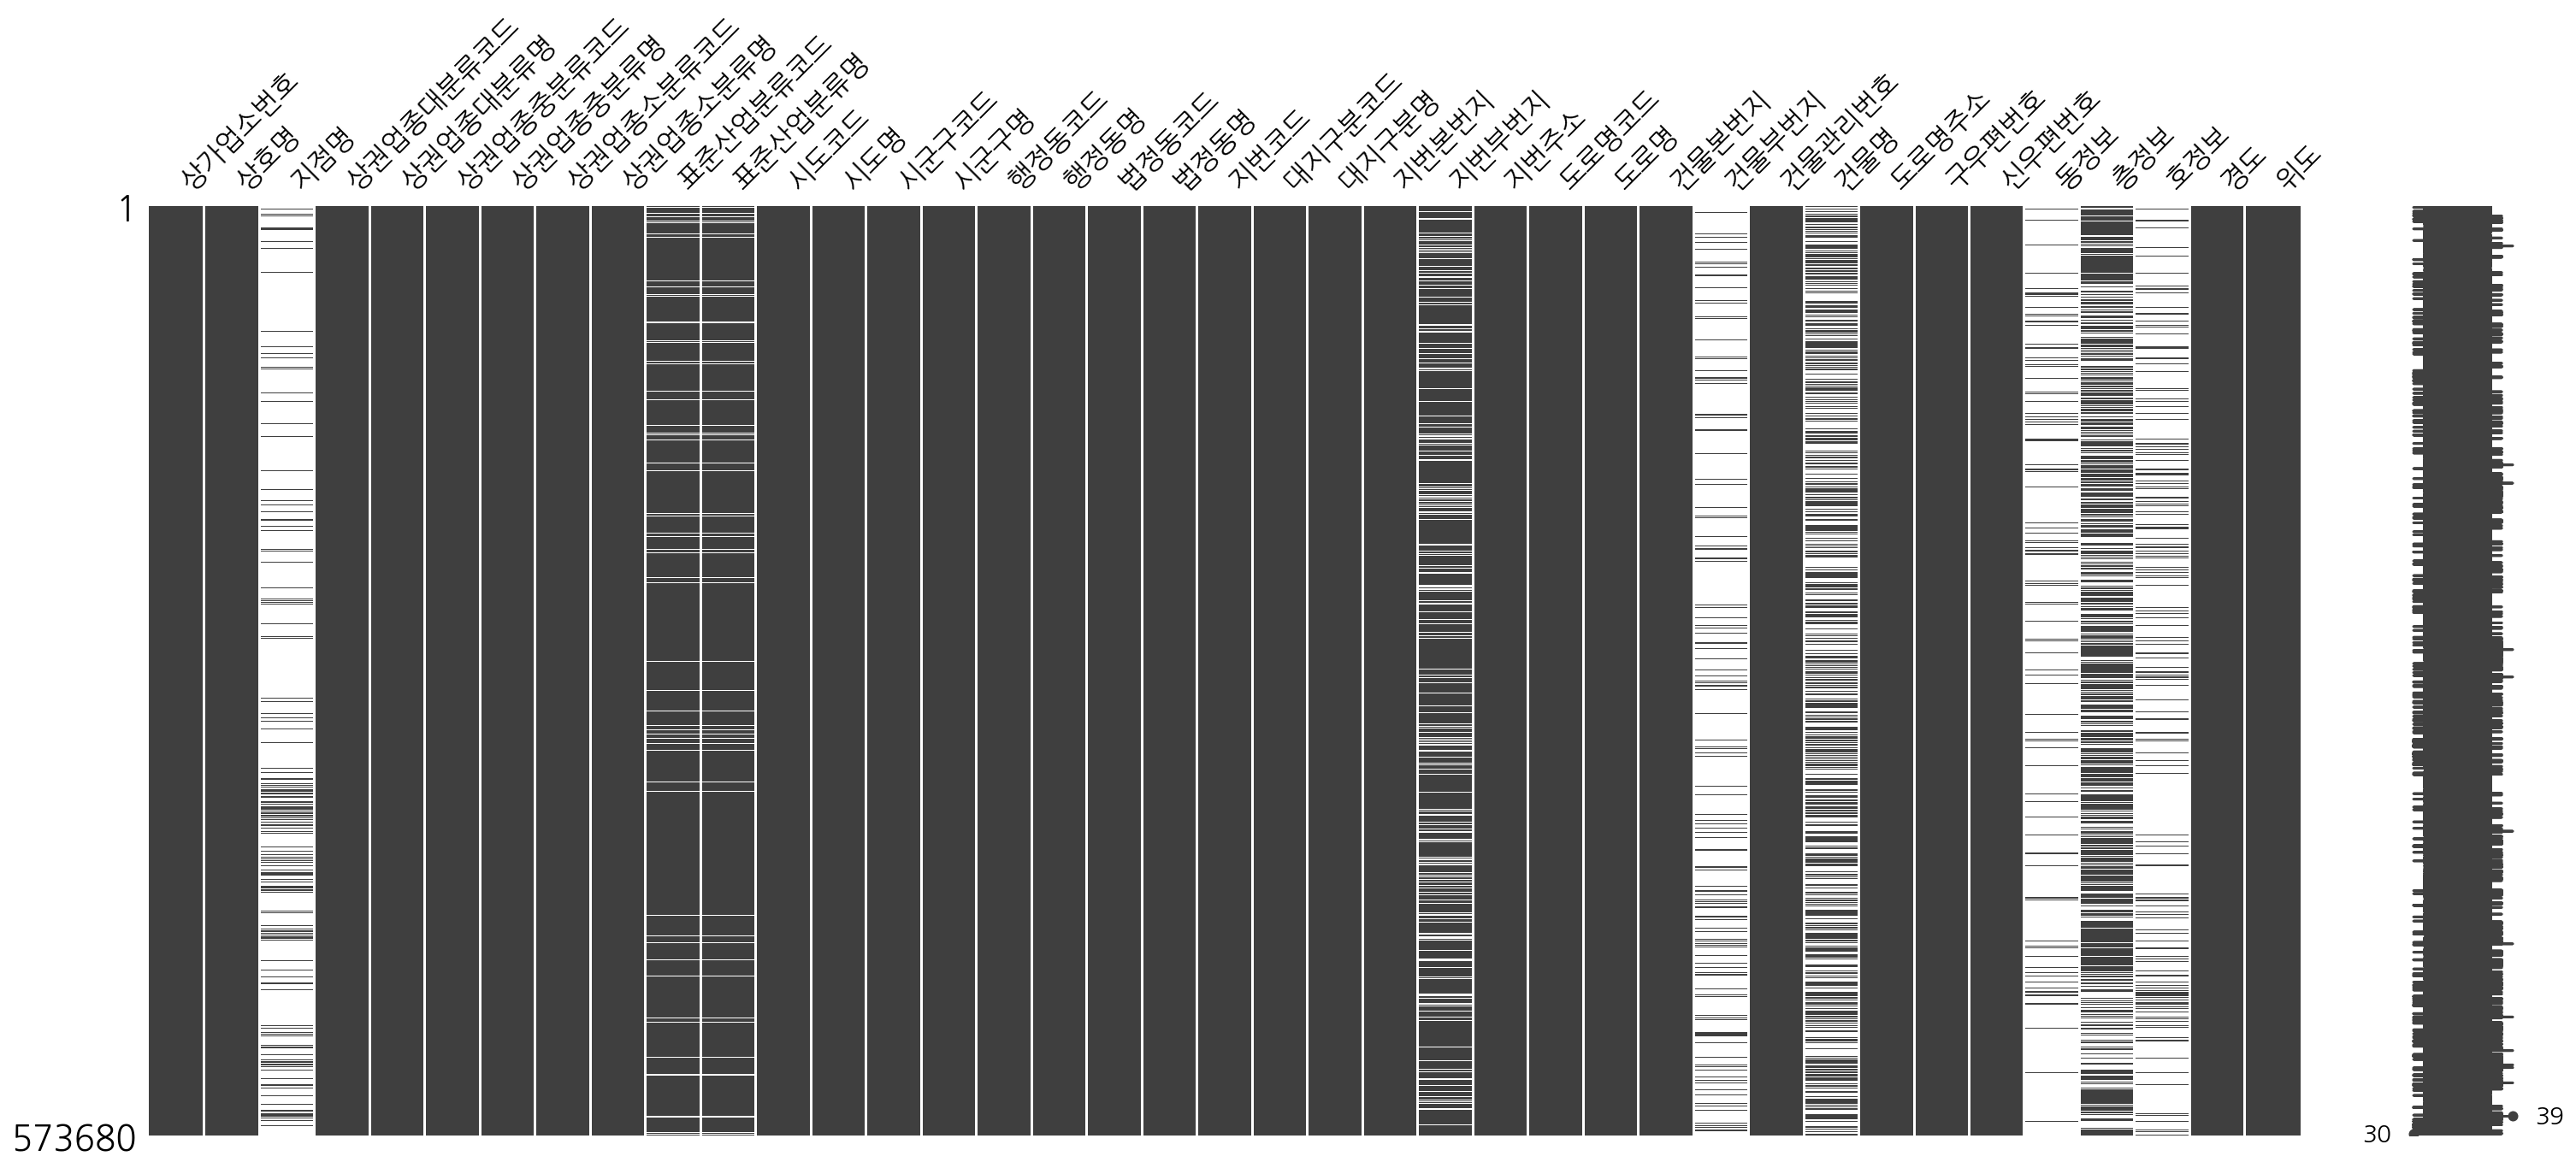

In [56]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

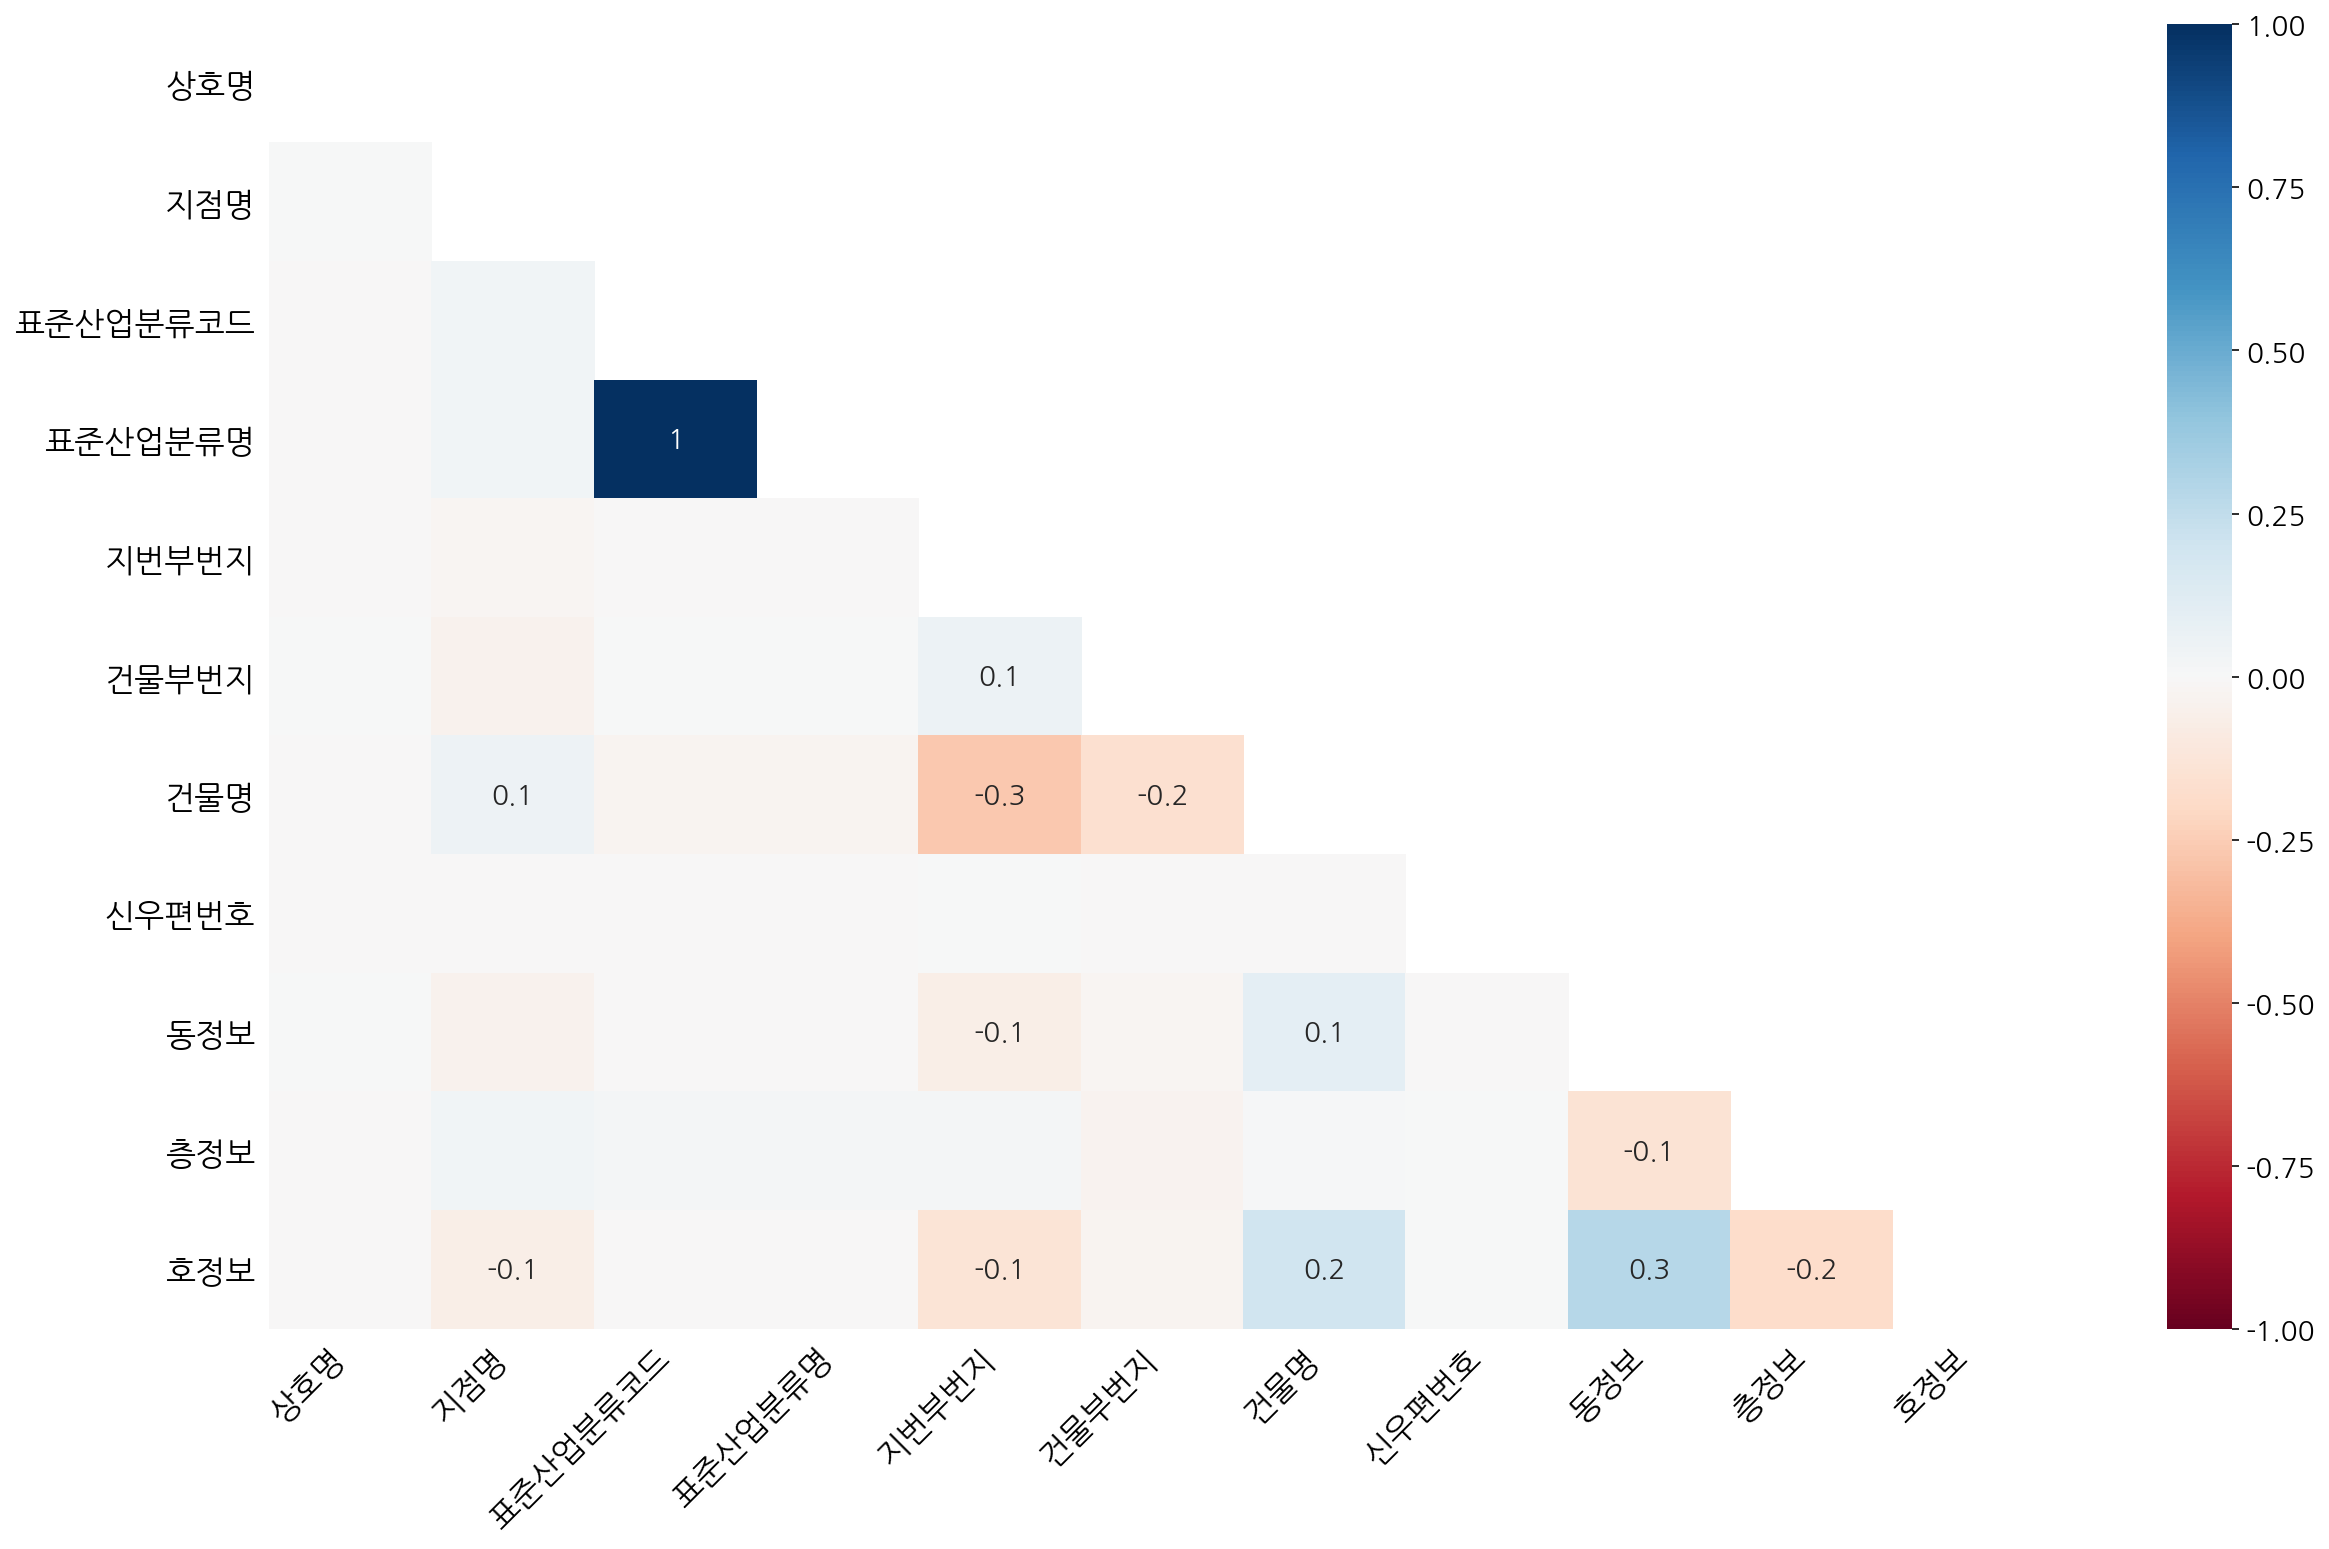

In [57]:
# heatmap 으로 표현합니다.
msno.heatmap(df)

- 덴드로 그램
    https://bcho.tistory.com/1204
    - 덴드로 그램은 나무를 나타내는 다이어그램입니다. 
    - 이 다이어그램 표현은 다른 상황에서 자주 사용됩니다. 
    - 계층 적 클러스터링에서, 이는 대응하는 분석에 의해 생성 된 클러스터의 배열을 예시한다

<AxesSubplot:>

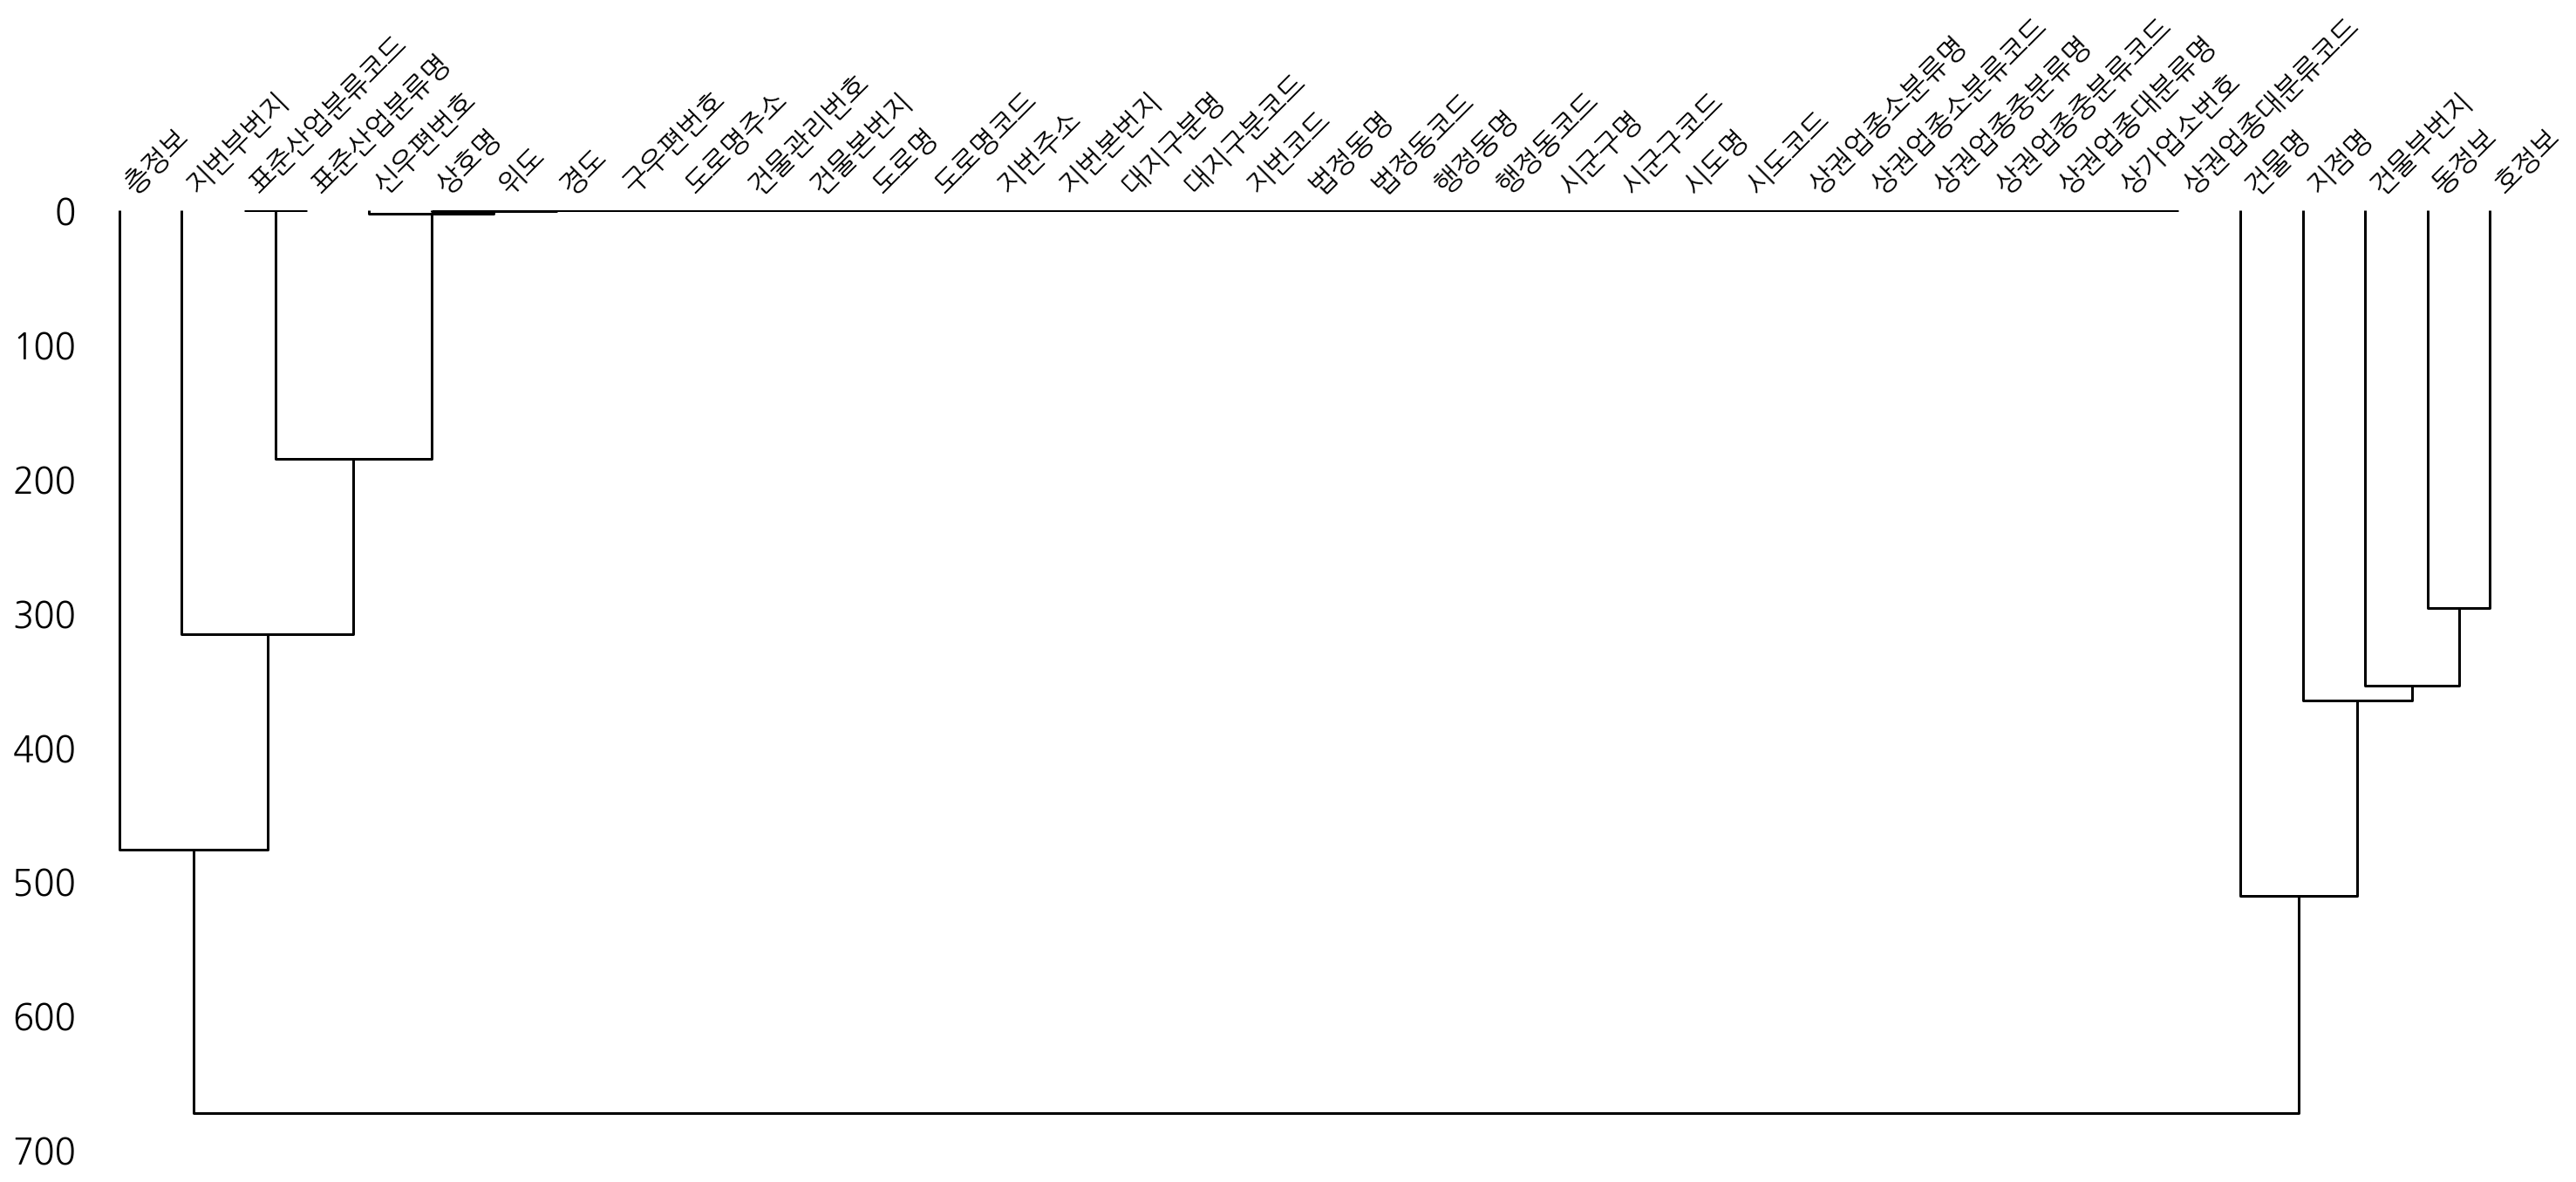

In [58]:
# dendrogram 으로 표현합니다.

msno.dendrogram(df)

## 사용하지 않는 컬럼 제거하기

### 결측치가 너무 많은 컬럼 제거하기

In [64]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수에 담습니다.
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 이라는 변수에 담습니다.

not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [67]:
# 사용하지 않는 컬럼을 제거하고 잘 제거가 되었는지 shape 의 수로 확인합니다.
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


In [68]:
# info()를 통해 해당 컬럼이 제거되었는지 확인하며 메모리 사용량이 줄어들었는지 확인합니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

### 사용하지 않는 컬럼 제거하기

In [69]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 담습니다.

cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [72]:
# 컬럼명에 "코드", "번호"가 있지만 이번 분석에서는 사용하지 않기 때문에 
# 해당되는 컬럼만 찾아와서 cols_code 라는 변수에 담습니다.
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [73]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거합니다.
#  제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인합니다.
print(df.shape)
df = df.drop(cols_code , axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


In [75]:
# info를 통해 컬럼정보와 메모리 사용량 등을 확인합니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


## 행, 열을 기준으로 값을 가져오기

### 열(column)기준 
* df[열이름]
    * 결과가 Pandas 의 Series 형태로 반환
* df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [84]:
# "상호명" 컬럼만 가져옵니다.

df["상호명"].head()

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
3         싱싱커피&토스트
4         가락사우나내스낵
Name: 상호명, dtype: object

In [86]:
# "상호명", "도로명주소" 2개의 컬럼을 가져옵니다.
df[["상호명","도로명주소"]].head()


상호명                 도로명주소
0         와라와라호프  서울특별시 강남구 남부순환로 2933
1  커피빈코리아선릉로93길점    서울특별시 강남구 선릉로93길 6
2           프로포즈    서울특별시 금천구 가산로 34-6
3       싱싱커피&토스트      부산광역시 사상구 괘감로 37
4       가락사우나내스낵      서울특별시 송파구 가락로 71

### 행(row) 기준
* df.loc[행]
* df.loc[행, 열]


* df.loc[행이름 혹은 번호]
    * 결과가 Pandas 의 Series 형태로 반환
* df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [88]:
# 0 번째 인덱스 행을 가져옵니다.
df.loc[0]


상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                       127.061
위도                       37.4939
Name: 0, dtype: object

In [90]:
# 0, 1,2 번째 인덱스 행을 가져옵니다.

df.loc[[0,1,2]]

상호명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명 대지구분명  \
0         와라와라호프       음식     유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동    대지   
1  커피빈코리아선릉로93길점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동    대지   
2           프로포즈       음식     유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동    대지   

   지번본번지                  지번주소               도로명  건물본번지                 도로명주소  \
0    604     서울특별시 강남구 대치동 604   서울특별시 강남구 남부순환로   2933  서울특별시 강남구 남부순환로 2933   
1    696  서울특별시 강남구 역삼동 696-42  서울특별시 강남구 선릉로93길      6    서울특별시 강남구 선릉로93길 6   
2    162   서울특별시 금천구 독산동 162-1     서울특별시 금천구 가산로     34    서울특별시 금천구 가산로 34-6   

           경도         위도  
0  127.061026  37.493922  
1  127.047883  37.505675  
2  126.899220  37.471711

In [92]:
# 0번째 행의 "상호명"을 가져옵니다.
# df.loc[0]["상호명"]
df.loc[0 , "상호명"]

'와라와라호프'

In [93]:
# 0, 1, 2 번째 행의 "상호명"을 가져옵니다.

df.loc[[0,1,2], "상호명"]

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
Name: 상호명, dtype: object

In [94]:
# 0, 1, 2 번째 행의 "상호명", "도로명주소"를 가져옵니다.

df.loc[[0,1,2], ["상호명" , "도로명주소"]]

상호명                 도로명주소
0         와라와라호프  서울특별시 강남구 남부순환로 2933
1  커피빈코리아선릉로93길점    서울특별시 강남구 선릉로93길 6
2           프로포즈    서울특별시 금천구 가산로 34-6

### iloc 로 슬라이싱을 통해 가져오기

* df.iloc[:] 전체 데이터를 가져옵니다.  
* df.iloc[행, 열] 순으로 인덱스 번호를 지정합니다.
* : 은 전체를 의미합니다.
* 시작인덱스:끝나는인덱스+1을 써줍니다. 
    * 예) 3:5 라면 3번째 인덱스 부터 4번째 인덱스까지 가져옵니다.
* : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미합니다.
    * 예) :5 => 처음부터 4번 인덱스까지 가져옵니다.
    * 예) 5: => 5번 인덱스부터 끝까지 가져옵니다.
    * 예) -5: => 뒤에서 5번째 부터 끝까지 가져옵니다.
    * 예) :-5 => 처음부터 5번째 전까지 가져옵니다.

In [102]:
# 위에서 5개의 행과, 왼쪽에서 5개의 열을 가져옵니다.
df.iloc[:5, :5]

상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시
3       싱싱커피&토스트       음식     패스트푸드        토스트전문  부산광역시
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시

In [103]:
cols[-5:]

Index(['도로명주소', '구우편번호', '신우편번호', '경도', '위도'], dtype='object')

In [105]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열을 가져옵니다.
df.iloc[-5:, -5:]

도로명  건물본번지                   도로명주소          경도  \
573675  서울특별시 마포구 마포대로14길      4     서울특별시 마포구 마포대로14길 4  126.955059   
573676   서울특별시 성동구 성수일로8길     37     서울특별시 성동구 성수일로8길 37  127.054615   
573677     서울특별시 강남구 강남대로    492      서울특별시 강남구 강남대로 492  127.024102   
573678   서울특별시 영등포구 국제금융로     10     서울특별시 영등포구 국제금융로 10  126.924863   
573679  서울특별시 도봉구 도봉로114길     22  서울특별시 도봉구 도봉로114길 22-8  127.035145   

               위도  
573675  37.548618  
573676  37.545853  
573677  37.506202  
573678  37.525172  
573679  37.647099

In [107]:
df.tail()

상호명  상권업종대분류명      상권업종중분류명   상권업종소분류명    시도명  시군구명    행정동명  \
573675   비파티세리공덕        음식            한식  한식/백반/한정식  서울특별시   마포구     공덕동   
573676     앤탑PC방  관광/여가/오락  PC/오락/당구/볼링등     인터넷PC방  서울특별시   성동구  성수2가3동   
573677  오즈아레나PC방  관광/여가/오락  PC/오락/당구/볼링등     인터넷PC방  서울특별시   강남구    논현1동   
573678    파인트리네일     생활서비스       이/미용/건강     발/네일케어  서울특별시  영등포구     여의동   
573679    마이리틀네일     생활서비스       이/미용/건강     발/네일케어  서울특별시   도봉구     창1동   

         법정동명 대지구분명  지번본번지                    지번주소                도로명  건물본번지  \
573675    공덕동    대지    105    서울특별시 마포구 공덕동 105-67  서울특별시 마포구 마포대로14길      4   
573676  성수동2가    대지    289  서울특별시 성동구 성수동2가 289-15   서울특별시 성동구 성수일로8길     37   
573677    논현동    대지    165     서울특별시 강남구 논현동 165-8     서울특별시 강남구 강남대로    492   
573678   여의도동    대지     23      서울특별시 영등포구 여의도동 23   서울특별시 영등포구 국제금융로     10   
573679     창동    대지    812        서울특별시 도봉구 창동 812  서울특별시 도봉구 도봉로114길     22   

                         도로명주소          경도         위도  
573675     서울특별시 마포구 마포대로14길 4  126.955059  37.548618  
573676     서울특별시 성동구 성수일로8길 37  127.054615  37.545853  
573677      서울특별시 강남구 강남대로 492  127.024102  37.506202  
573678     서울특별시 영등포구 국제금융로 10  126.924863  37.525172  
573679  서울특별시 도봉구 도봉로114길 22-8  127.035145  37.647099

## 기술통계 값 보기

### describe 로 요약하기


* describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
* 기본적으로 수치형 데이터를 요약해서 보여줍니다. 
* include, exclude 옵션으로 데이터 타입에 따른 요약수치를 볼 수 있습니다.
* 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.
* [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)

In [381]:
# describe 로 기술통계값을 봅니다.
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.

# DataFrame.count: NA/null이 아닌 관측치의 개수
# DataFrame.max: 객체의 최대값.
# DataFrame.min: 객체의 최소값.
# DataFrame.mean: 값의 평균.
# DataFrame.std: 관측치의 표준 편차.
# DataFrame.select_dtypes: DataFrame의 하위 집합 포함/제외
# dtype을 기준으로 한 컬럼.
df.describe()

지번본번지          건물본번지             경도             위도
count  573680.000000  573680.000000  573680.000000  573680.000000
mean      469.281810     153.912094     127.596287      36.854698
std       484.778049     276.980935       0.941262       1.081285
min         1.000000       0.000000     126.768169      35.006760
25%       109.000000      20.000000     126.968316      35.215422
50%       335.000000      50.000000     127.047672      37.511207
75%       678.000000     172.000000     128.986938      37.560362
max      9999.000000    3318.000000     129.292243      37.692398

In [382]:
# 필요한 컬럼에 대한 요약만 봅니다. 
# 위도, 경도 만 따로 가져와 요약합니다.

df[["위도","경도"]].describe()

위도             경도
count  573680.000000  573680.000000
mean       36.854698     127.596287
std         1.081285       0.941262
min        35.006760     126.768169
25%        35.215422     126.968316
50%        37.511207     127.047672
75%        37.560362     128.986938
max        37.692398     129.292243

### 개별 기술통계 값 구하기



* [Computational tools — pandas 1.0.1 documentation](https://pandas.pydata.org/docs/user_guide/computation.html#method-summary)

* count 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
* min, max 최솟값, 최댓값
* argmin, argmax 최솟값, 최댓값이 위치한 (정수)인덱스를 반환
* idxmin, idxmax 인덱스 중 최솟값, 최댓값을 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)
* mad 평균값으로부터의 절대 편차(absolute deviation)의 평균
* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)

In [383]:
# 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
df["위도"].count()

573680

In [114]:
# 평균
df["위도"].mean()

36.85469787421801

In [116]:
# 최댓값
df["위도"].max()

37.69239838166121

In [115]:
# 최솟값
df["위도"].min()

35.0067597383124

In [118]:
# 1사분위 수(25%)
df["위도"].quantile(q=0.25)

35.21542173433561

In [103]:
# 2사분위 수(25%) == 중앙값
df["위도"].quantile()

In [119]:
# 중앙값
df["위도"].medianian()

37.5112070048312

In [121]:
# 중앙값 vs 평균값
df["위도"].mean()

36.85469787421801

In [122]:
# 분산
df["위도"].var()

1.1691762199811755

* 출처 : [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)

표준 편차(標準 偏差, 영어: standard deviation)는 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의된다. 표준편차가 작을수록 평균값에서 변량들의 거리가 가깝다.[1] 통계학과 확률에서 주로 확률의 분포, 확률변수 혹은 측정된 인구나 중복집합을 나타낸다. 일반적으로 모집단의 표준편차는 {\displaystyle \sigma }\sigma (시그마)로, 표본의 표준편차는 {\displaystyle S}S(에스)로 나타낸다.[출처 필요]

편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것이다.

분산(variance)은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.

표준 편차(standard deviation)는 분산을 제곱근한 것이다. 제곱해서 값이 부풀려진 분산을 제곱근해서 다시 원래 크기로 만들어준다.

In [124]:
# 표준편차 => 분산에 root 를 씌운 값입니다.
import numpy as np
np.sqrt(df["위도"].var())

1.0812845231395738

In [384]:
df["위도"].std()

1.0812845231395738

### 단변량 수치형 변수 시각화

In [385]:
sns.distplot?

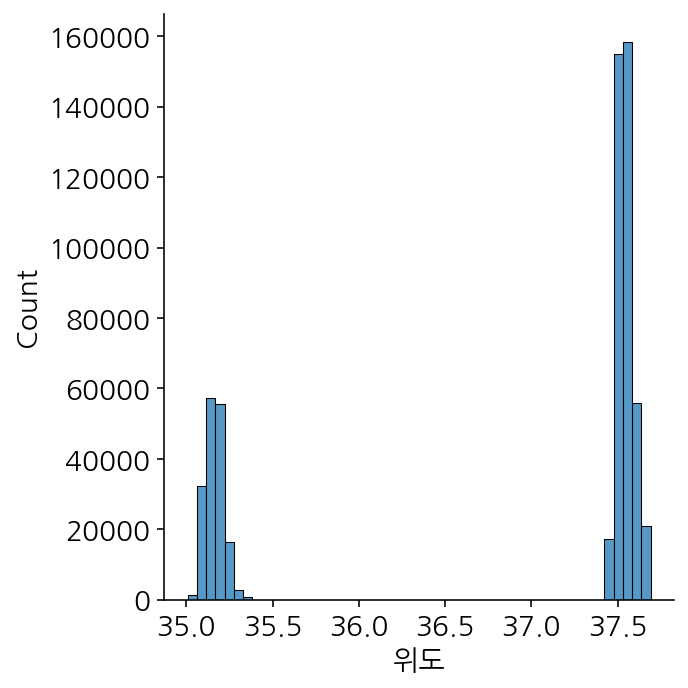

In [386]:
# 위도의 distplot 을 그립니다.
sns.displot(df["위도"], bins=50)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='경도', ylabel='Density'>

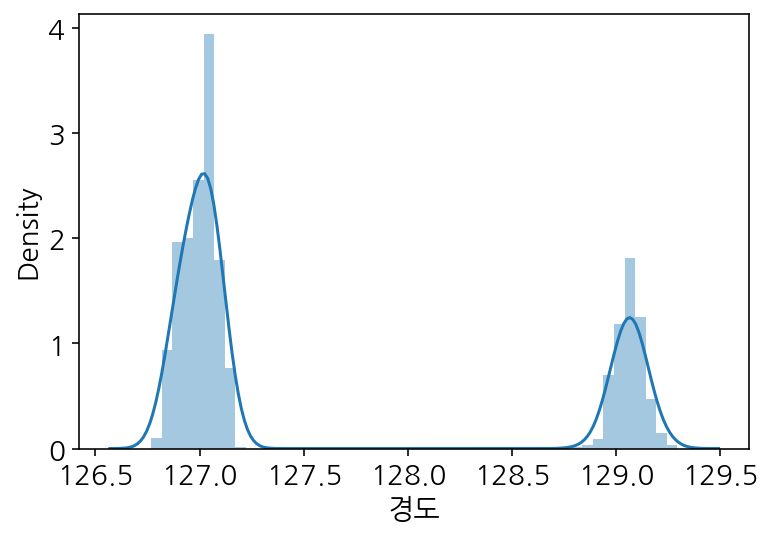

In [387]:
# 경도의 distplot 을 그립니다.
sns.distplot(df["경도"], bins=50)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='위도', ylabel='Density'>

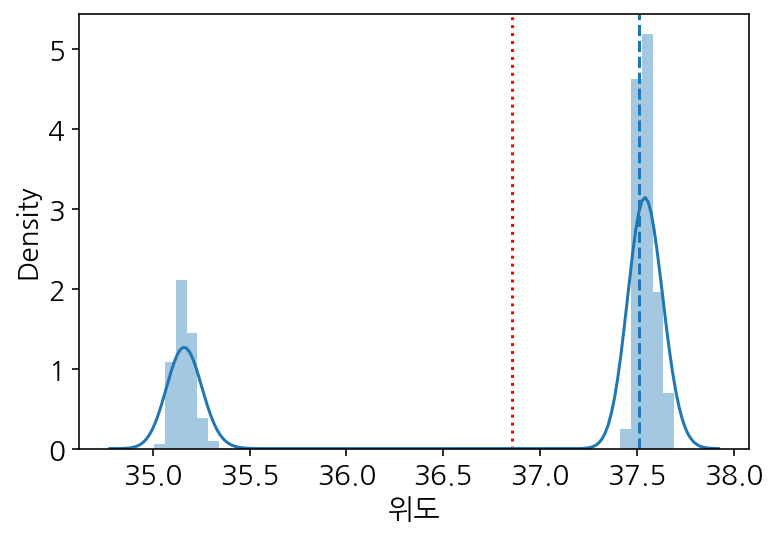

In [390]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을 linestyle 로 점선으로 표시해 봅니다.
plt.axvline(df["위도"].mean() , linestyle=":", color="r")
plt.axvline(df["위도"].median() , linestyle="--")
sns.distplot(df["위도"])

### 상관계수
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.
* 결정계수(coefficient of determination) 는 r ** 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [Correlation and dependence - Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence)

In [145]:
# 각 변수의 상관계수를 구합니다.

corr = df.corr()
corr

지번본번지     건물본번지        경도        위도
지번본번지  1.000000  0.057987  0.182678 -0.196658
건물본번지  0.057987  1.000000  0.000255  0.004606
경도     0.182678  0.000255  1.000000 -0.994711
위도    -0.196658  0.004606 -0.994711  1.000000

* 상관계수 시각화 : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<AxesSubplot:>

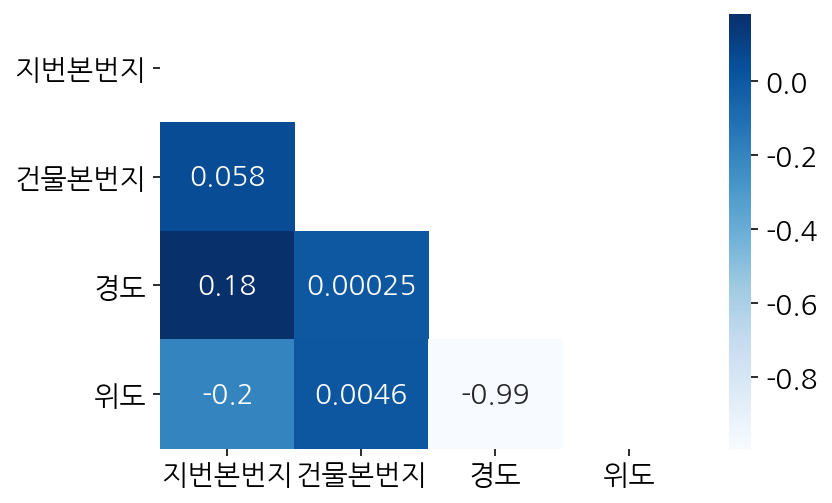

In [394]:
# 위에서 구한 상관계수를 시각화 합니다.
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True , cmap="Blues", mask=mask)

### 산점도로 이변량 수치형 변수 표현하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

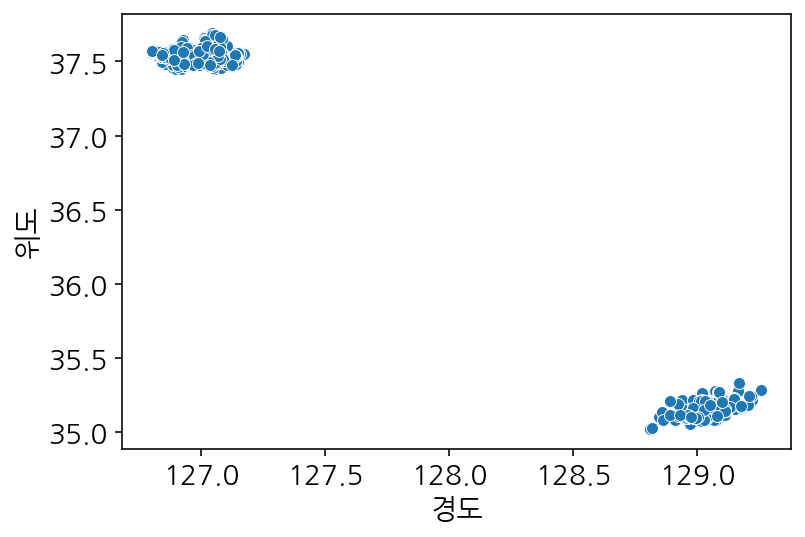

In [395]:
# scatterplot 으로 경도와 위도를 표현하며, 
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000 개의 샘플을 추출해서 그립니다.
sns.scatterplot(data=df.sample(1000) , x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

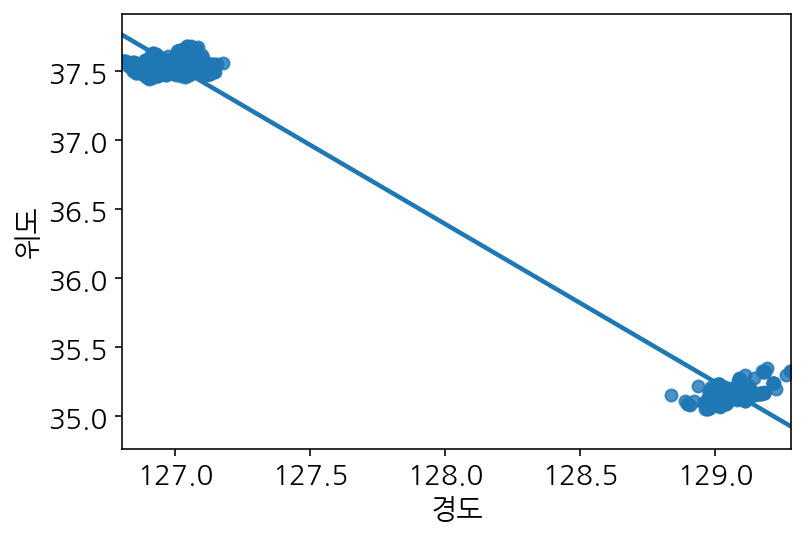

In [396]:
# 위 시각화에서 회귀선을 그립니다.
sns.regplot(data=df.sample(1000) , x="경도", y="위도")

[Anscombe’s quartet — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)

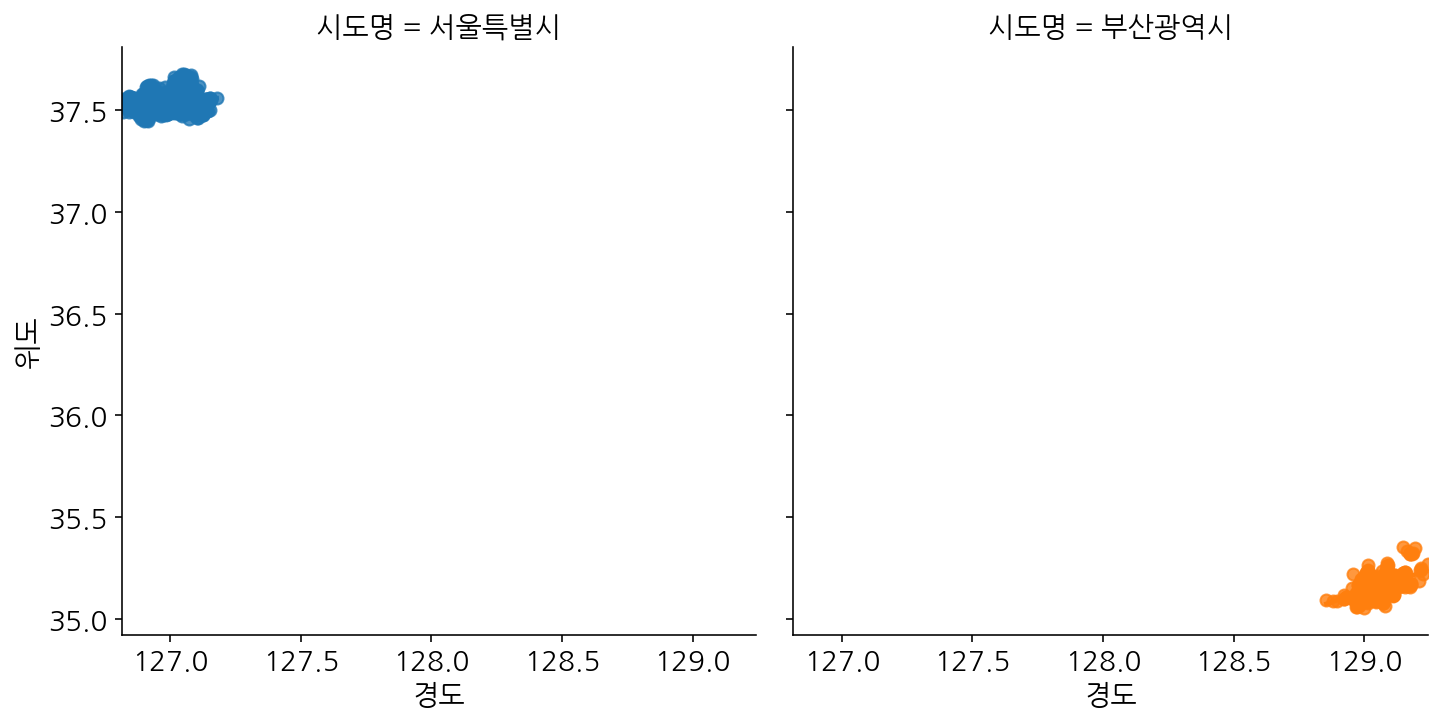

In [397]:
# 회귀선을 그리는 그래프의 서브플롯을 그립니다.
sns.lmplot(data=df.sample(1000) , x="경도", y="위도",hue="시도명", col="시도명")

### object 타입의 데이터 요약하기

In [398]:
# include="object" 로 문자열 데이터에 대한 요약을 봅니다.
df.describe(include="object")

상호명 상권업종대분류명 상권업종중분류명   상권업종소분류명     시도명    시군구명    행정동명    법정동명  \
count   573679   573680   573680     573680  573680  573680  573680  573680   
unique  378758        9       94        709       2      39     629     648   
top      점프셈교실       음식       한식  한식/백반/한정식   서울특별시     강남구    역삼1동     역삼동   
freq      2297   185516    59725      38133  407376   47080   10400   12102   

         대지구분명                   지번주소             도로명                도로명주소  
count   573680                 573680          573680               573680  
unique       2                 190237           18001               190486  
top         대지  부산광역시 부산진구 부전동 503-15  서울특별시 서초구 신반포로  부산광역시 부산진구 가야대로 772  
freq    572913                   1058            3543                 1058

In [399]:
# 상권업종대분류명 의 요약값을 봅니다.
df["상권업종대분류명"].describe()

count     573680
unique         9
top           음식
freq      185516
Name: 상권업종대분류명, dtype: object

In [400]:
# 상권업종대분류명 의 unique 값을 봅니다.

df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [401]:
# 상권업종대분류명 의 unique 값의 갯수를 세어봅니다.
df["상권업종대분류명"].nunique()

9

In [402]:
df["상권업종대분류명"].mode()

0    음식
dtype: object

### 범주형 변수의 빈도수 구하기

In [403]:
# value_counts 로 상권업종대분류명 의 빈도수를 구합니다.

df["상권업종대분류명"].value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

## 인덱싱과 필터로 서브셋 만들기

In [406]:
# "상권업종대분류명" 이 "음식인 데이터만 가져오기
# df_food 라는 변수에 담아줍니다. 서브셋을 새로운 변수에 저장할 때 copy()를 사용하는 것을 권장합니다.

df_food = df[df["상권업종대분류명"] == "음식"].copy()
df_food

상호명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명 시군구명    행정동명  \
0              와라와라호프       음식     유흥주점        호프/맥주  서울특별시  강남구    대치1동   
1       커피빈코리아선릉로93길점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강남구    역삼1동   
2                프로포즈       음식     유흥주점        호프/맥주  서울특별시  금천구    독산3동   
3            싱싱커피&토스트       음식    패스트푸드        토스트전문  부산광역시  사상구     괘법동   
5                 초밥왕       음식   일식/수산물     음식점-초밥전문  서울특별시  송파구    잠실6동   
...               ...      ...      ...          ...    ...  ...     ...   
573658         브레드앤로즈       음식  제과제빵떡케익          제과점  서울특별시  성동구  성수1가1동   
573669         스테프핫도그       음식    패스트푸드        패스트푸드  서울특별시  마포구     도화동   
573670           평창갈비       음식       한식       갈비/삼겹살  서울특별시  송파구    방이1동   
573671            휴돈정       음식       양식       돈가스전문점  서울특별시  노원구    공릉1동   
573675        비파티세리공덕       음식       한식    한식/백반/한정식  서울특별시  마포구     공덕동   

         법정동명 대지구분명  지번본번지                     지번주소                 도로명  \
0         대치동    대지    604        서울특별시 강남구 대치동 604     서울특별시 강남구 남부순환로   
1         역삼동    대지    696     서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길   
2         독산동    대지    162      서울특별시 금천구 독산동 162-1       서울특별시 금천구 가산로   
3         괘법동    대지    578        부산광역시 사상구 괘법동 578       부산광역시 사상구 괘감로   
5         신천동    대지      7       서울특별시 송파구 신천동 7-28      서울특별시 송파구 올림픽로   
...       ...   ...    ...                      ...                 ...   
573658  성수동1가    대지    685  서울특별시 성동구 성수동1가 685-704      서울특별시 성동구 왕십리로   
573669    마포동    대지    418      서울특별시 마포구 마포동 418-1   서울특별시 마포구 마포대로4다길   
573670    방이동    대지    165      서울특별시 송파구 방이동 165-3     서울특별시 송파구 위례성대로   
573671    공릉동    대지    383     서울특별시 노원구 공릉동 383-12  서울특별시 노원구 동일로191가길   
573675    공덕동    대지    105     서울특별시 마포구 공덕동 105-67   서울특별시 마포구 마포대로14길   

        건물본번지                  도로명주소          경도         위도  
0        2933   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1           6     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2          34     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3          37       부산광역시 사상구 괘감로 37  128.980455  35.159774  
5         293  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149  
...       ...                    ...         ...        ...  
573658     63      서울특별시 성동구 왕십리로 63  127.043565  37.543610  
573669     41   서울특별시 마포구 마포대로4다길 41  126.943989  37.535121  
573670     98     서울특별시 송파구 위례성대로 98  127.122565  37.513543  
573671      6   서울특별시 노원구 동일로191가길 6  127.071622  37.625316  
573675      4    서울특별시 마포구 마포대로14길 4  126.955059  37.548618  

[185516 rows x 16 columns]

### 강남구의 상권업종대분류가 음식만 보기

In [407]:
# 시군구명이 "강남구" 인 데이터만 가져옵니다.
df[df["시군구명"] == "강남구"].head()

상호명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0           와라와라호프       음식     유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1    커피빈코리아선릉로93길점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
26              쉼터       음식       분식       라면김밥분식  서울특별시  강남구  삼성1동  삼성동   
27  배제현의웰빙낙지한마리수제비       음식   일식/수산물       낙지/오징어  서울특별시  강남구   신사동  신사동   
38        타워광명내과의원       의료       병원        내과/외과  서울특별시  강남구  도곡2동  도곡동   

   대지구분명  지번본번지                  지번주소                 도로명  건물본번지  \
0     대지    604     서울특별시 강남구 대치동 604     서울특별시 강남구 남부순환로   2933   
1     대지    696  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길      6   
26    대지    159     서울특별시 강남구 삼성동 159      서울특별시 강남구 봉은사로    524   
27    대지    512  서울특별시 강남구 신사동 512-13  서울특별시 강남구 강남대로152길     19   
38    대지    467  서울특별시 강남구 도곡동 467-14    서울특별시 강남구 언주로30길     39   

                    도로명주소          경도         위도  
0    서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1      서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
26     서울특별시 강남구 봉은사로 524  127.057100  37.512939  
27  서울특별시 강남구 강남대로152길 19  127.020945  37.517574  
38    서울특별시 강남구 언주로30길 39  127.053198  37.488742

In [410]:
# 이번에는 시군구명이 "강남구" 이고 "상권업종대분류명" 이 "음식"인 서브셋을 가져온 후 
# "상권업종중분류명" 별로 빈도수를 구합니다.
# df[df["시군구명"] == "강남구" & df["상권업종대분류명"] == "음식"]["상권업종중분류명"].value_counts()
df[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "음식")]["상권업종중분류명"].value_counts()


한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

In [411]:
# 위와 똑같이 구하지만 이번에는 loc를 사용합니다.
# loc[행, 열]
df.loc[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "음식") , "상권업종중분류명"].value_counts()



한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

### 구별 음식점 업종 비교하기

In [412]:
# df_seoul_food 에 "시도명"이 "서울특별시" 이고 "상권업종대분류명" 이 "음식" 에 대한 서브셋만 가져와서 담아줍니다.

df_seoul_food = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "음식")].copy()
df_seoul_food.shape

(132889, 16)

In [185]:
# "시군구명", "상권업종중분류명" 으로 그룹화 해서 상점수를 세어봅니다.
# 결과를 food_gu 에 담아 재사용할 예정입니다.
food_gu = df_seoul_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()
food_gu.head()

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
Name: 상호명, dtype: int64

<AxesSubplot:xlabel='상권업종중분류명'>

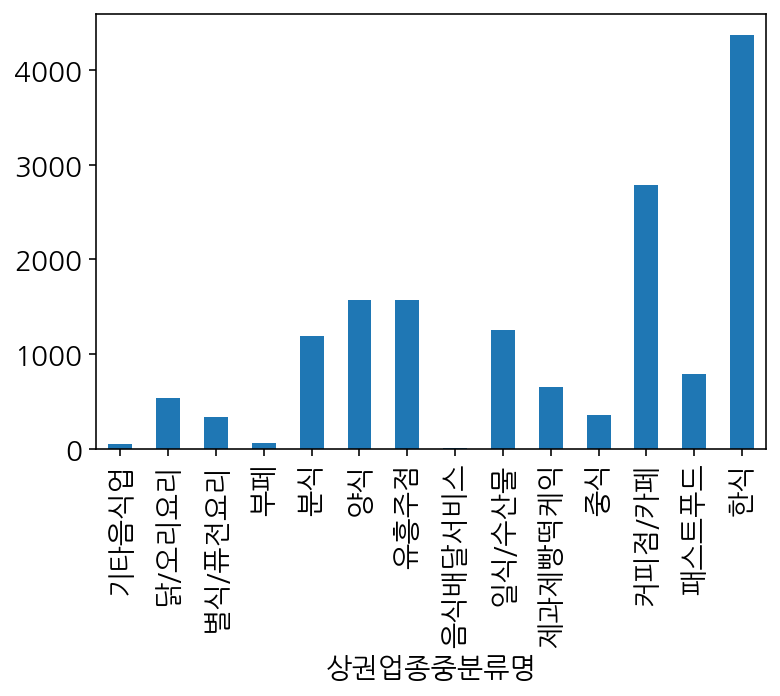

In [415]:
food_gu.loc["강남구"].plot.bar()


<AxesSubplot:xlabel='상권업종중분류명'>

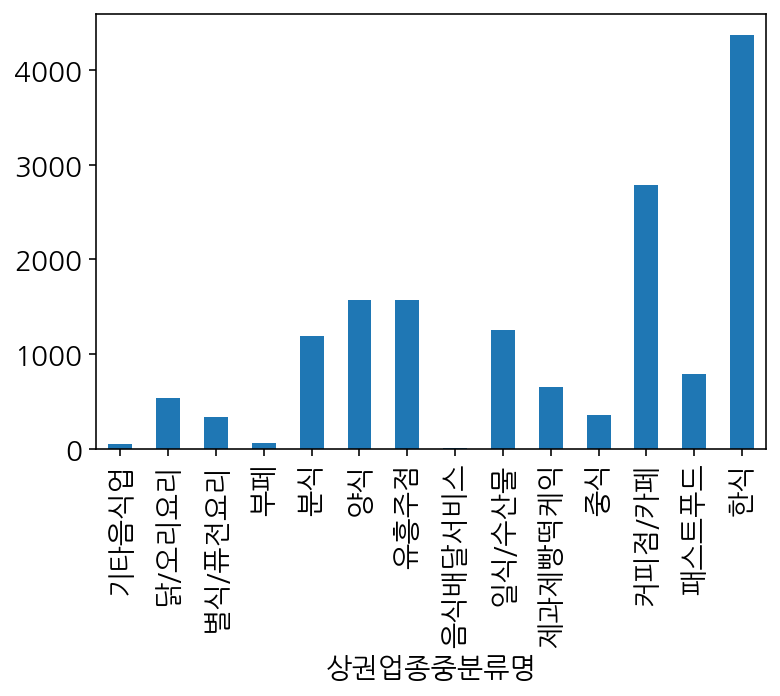

In [416]:
# food_gu 에 담긴 데이터를 시각화 합니다.
# 상권업종중분류명 과 상점수 로 barplot을 그립니다.
food_gu.unstack().loc["강남구"].plot.bar()

In [195]:
food_gu.unstack().iloc[:5,:5]

상권업종중분류명  기타음식업  닭/오리요리  별식/퓨전요리    부페      분식
시군구명                                          
강남구        47.0   539.0    341.0  63.0  1197.0
강동구         4.0   318.0    138.0  24.0   509.0
강북구         2.0   208.0     97.0   6.0   329.0
강서구        16.0   323.0    145.0  21.0   531.0
관악구        11.0   324.0    118.0  11.0   461.0

In [418]:
food = food_gu.reset_index()
food = food.rename(columns={"상호명":"상호수"})
food

시군구명 상권업종중분류명   상호수
0    강남구    기타음식업    47
1    강남구   닭/오리요리   539
2    강남구  별식/퓨전요리   341
3    강남구       부페    63
4    강남구       분식  1197
..   ...      ...   ...
343  중랑구  제과제빵떡케익   160
344  중랑구       중식    78
345  중랑구   커피점/카페   311
346  중랑구    패스트푸드   127
347  중랑구       한식  1251

[348 rows x 3 columns]

* https://seaborn.pydata.org/tutorial/categorical.html

<AxesSubplot:xlabel='상권업종중분류명', ylabel='상호수'>

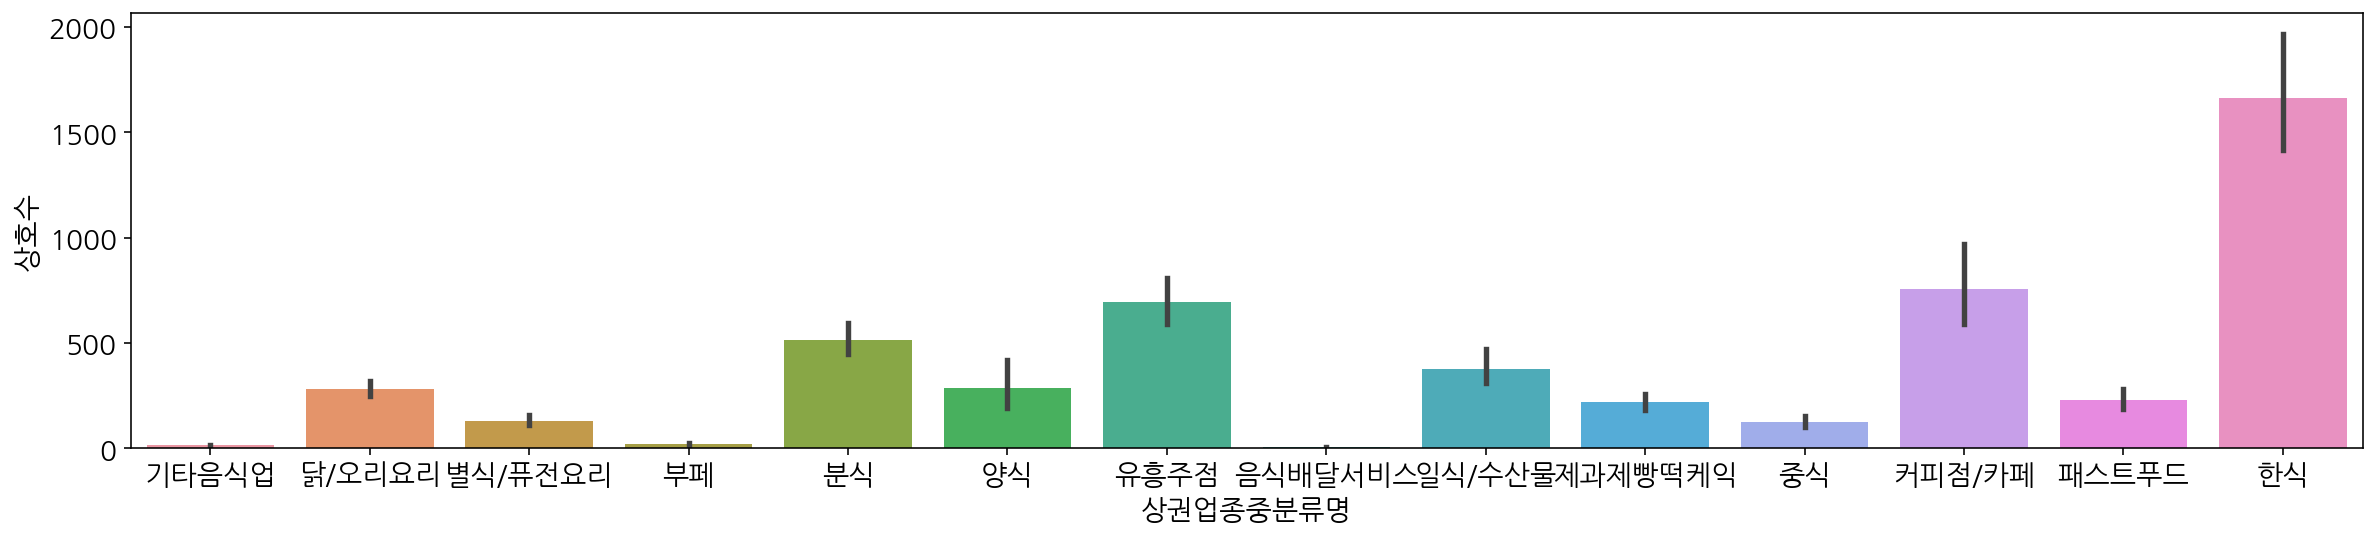

In [421]:
plt.figure(figsize=(20,4))
sns.barplot(data=food , x="상권업종중분류명" , y="상호수")

<Figure size 1800x360 with 0 Axes>

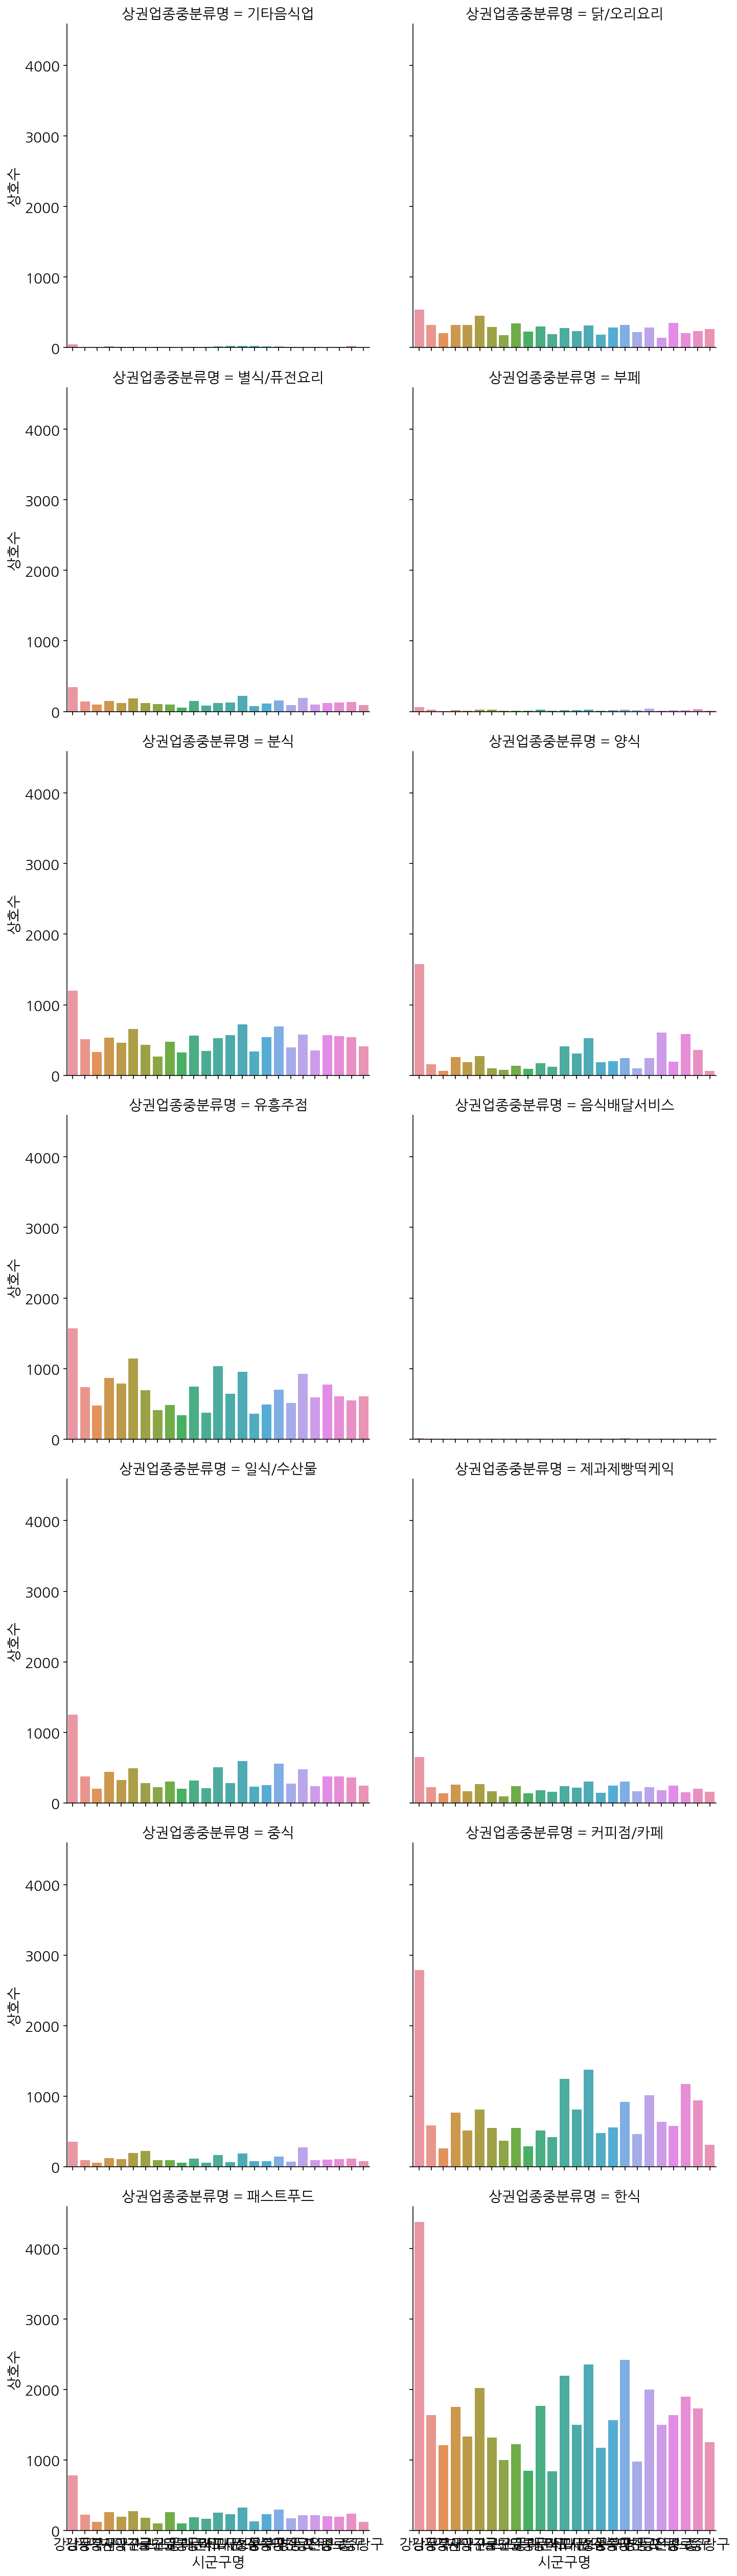

In [422]:
# catplot을 사용하여 서브프롯을 그립니다.
plt.figure(figsize=(25,5))
sns.catplot(data=food , x="시군구명" , y="상호수", kind="bar", col="상권업종중분류명", col_wrap=2)


## 구별 학원수 비교
* 주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 됩니다.
* 사교육이 발달한 지역으로 대치동이나 목동을 꼽는데 이 지역에 학원이 많이 분포 되어 있는지 알아봅니다.

### 서브셋 만들고 집계하기

In [423]:
# 학원의 분류명을 알아보기 위해 "상권업종대분류명"의 unique 값을 추출합니다.

df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [424]:
# "시도명"이 "서울특별시"이고 "상권업종대분류명"이 "학문/교육" 인 데이터를 서브셋으로 가져옵니다.
# 재사용을 위해 서브셋을 df_academy 에 저장합니다.

df_academy = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "학문/교육")].copy()
df_academy.head()

상호명 상권업종대분류명    상권업종중분류명   상권업종소분류명    시도명 시군구명  행정동명 법정동명 대지구분명  \
85   GIA보석교육원    학문/교육  학원-자격/국가고시    학원-보석감정  서울특별시  강남구  압구정동  신사동    대지   
101     안재형영어    학문/교육       학원-어학  학원-외국어/어학  서울특별시  양천구   목5동   목동    대지   
121       정아트    학문/교육   학원-음악미술무용   서예/서화/미술  서울특별시  강서구   염창동  염창동    대지   
126     경찰태권도    학문/교육   학원-예능취미체육       태권도장  서울특별시  성북구  길음1동  길음동    대지   
134   아트인스튜디오    학문/교육   학원-음악미술무용   서예/서화/미술  서울특별시  강남구  역삼1동  역삼동    대지   

     지번본번지                  지번주소                도로명  건물본번지  \
85     639   서울특별시 강남구 신사동 639-3     서울특별시 강남구 압구정로    320   
101    905   서울특별시 양천구 목동 905-34     서울특별시 양천구 목동서로    133   
121    184   서울특별시 강서구 염창동 184-8  서울특별시 강서구 양천로73가길     21   
126   1283  서울특별시 성북구 길음동 1283-4      서울특별시 성북구 길음로     20   
134    818   서울특별시 강남구 역삼동 818-1  서울특별시 강남구 강남대로96길     12   

                    도로명주소          경도         위도  
85     서울특별시 강남구 압구정로 320  127.036437  37.528532  
101  서울특별시 양천구 목동서로 133-2  126.875973  37.531592  
121  서울특별시 강서구 양천로73가길 21  126.873645  37.550924  
126      서울특별시 성북구 길음로 20  127.023020  37.604749  
134  서울특별시 강남구 강남대로96길 12  127.028054  37.499729

In [425]:
# df_academy 에서 "상호명"으로 빈도수를 구합니다.
df_academy["상호명"].value_counts().head(10)


점프셈교실      1659
해법수학         57
윤선생영어교실      34
뮤엠영어         27
해법영어교실       24
눈높이          22
해동검도         22
삼성영어         21
구몬학습         20
행복한어린이집      19
Name: 상호명, dtype: int64

In [426]:
# "시군구명" 으로 빈도수를 구합니다.
df_academy["시군구명"].value_counts()


강남구     4005
서초구     2103
양천구     1881
광진구     1848
송파구     1797
강동구     1585
노원구     1582
강서구     1498
은평구     1333
관악구     1313
성북구     1246
구로구     1140
동대문구    1051
동작구     1050
마포구     1007
영등포구     984
도봉구      931
중랑구      884
서대문구     773
성동구      742
금천구      701
종로구      638
강북구      513
용산구      491
중구       413
Name: 시군구명, dtype: int64

In [427]:
# "상권업종소분류명"으로 빈도수를 구하고 위에서 30개만 봅니다.

df_academy["상권업종소분류명"].value_counts().head(30)


학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
학원-기타           677
태권도장            610
학습지보급           430
학원-어린이영어        319
컴퓨터학원           270
학원-스포츠/재즈댄스     269
학원-무용           220
놀이방             139
학원-주산암산부기속셈     122
유아교육기관기타        107
학원-미용           106
학원-배우/탤런트       102
합기도장             96
검도도장             95
실내놀이터-유아         84
학원-요리            78
학원-간호조무사         76
학원/국가고시          70
학원-사교춤           54
유도장              49
학원-심리변론          46
학원-국악            45
Name: 상권업종소분류명, dtype: int64

In [428]:
# "상권업종소분류명"으로 빈도수를 구하고
# 빈도수가 1000개 이상인 데이터만 따로 봅니다.
academy_count =  df_academy["상권업종소분류명"].value_counts()
academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [237]:
# "시군구명", "상권업종소분류명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.

academy_group =  df_academy.groupby(["시군구명", "상권업종소분류명"])["상호명"].count()
academy_group.loc["강남구"]

상권업종소분류명
검도도장          9
고시원         139
놀이방           8
독서실         125
서예/서화/미술    219
           ... 
학원-편입         5
학원-피부미용       3
학원-한복기술       1
학원/국가고시       5
합기도장          4
Name: 상호명, Length: 73, dtype: int64

In [429]:
t = academy_group.reset_index()
t = t.rename(columns={"상호명":"상호수"})
t.head()

시군구명  상권업종소분류명  상호수
0  강남구      검도도장    9
1  강남구       고시원  139
2  강남구       놀이방    8
3  강남구       독서실  125
4  강남구  서예/서화/미술  219

### seaborn으로 시각화 하기

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

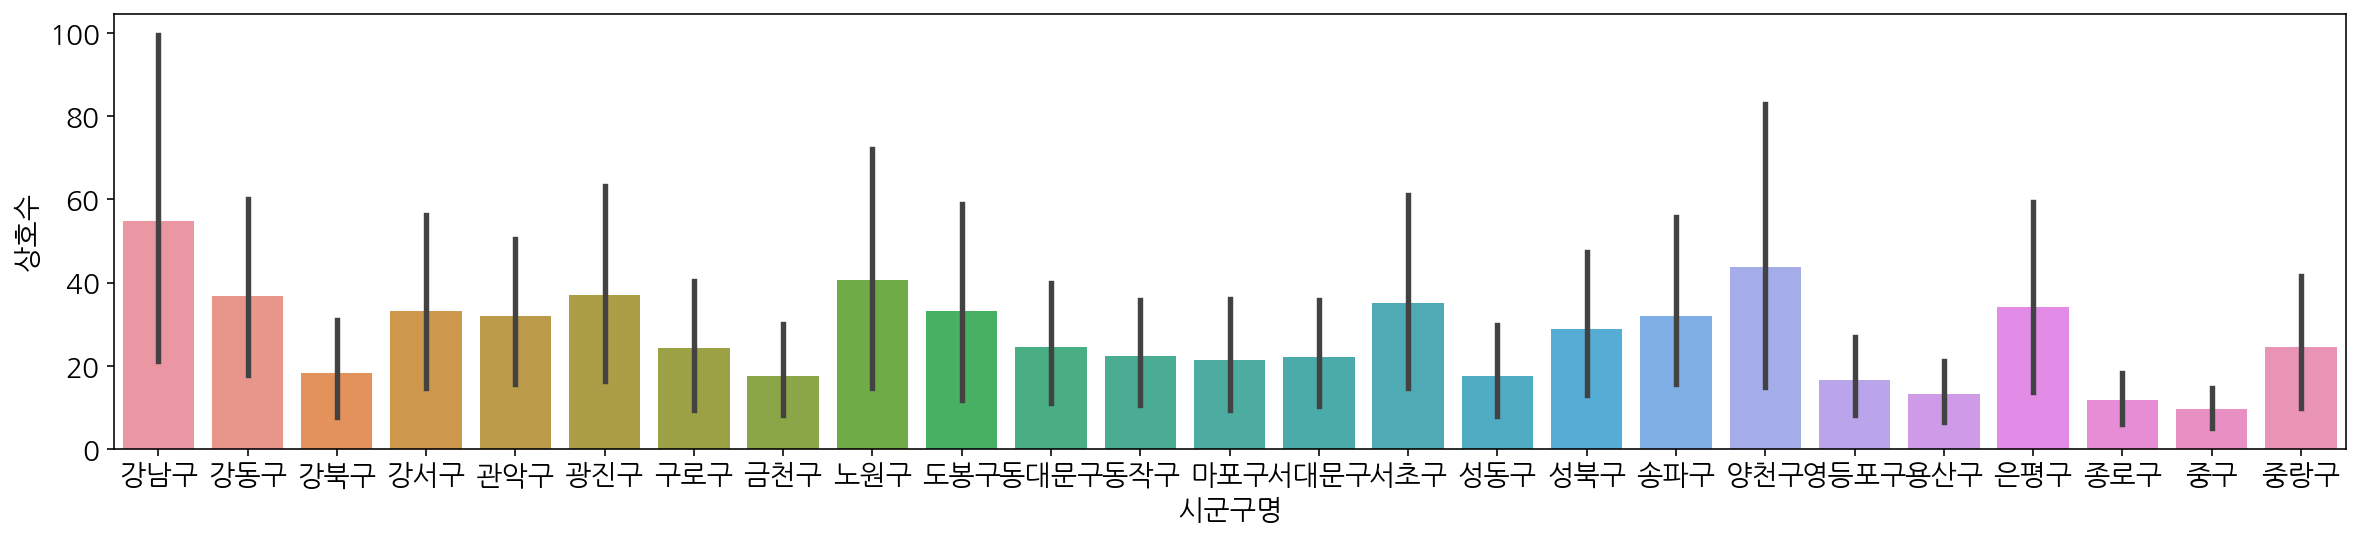

In [432]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot을 그립니다.
plt.figure(figsize=(20,4))
sns.barplot(data=t , x="시군구명" , y="상호수")


###  isin 을 사용해 서브셋 만들기
* 상권업종소분류명을 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.

In [433]:
df_academy["상권업종소분류명"].isin

<bound method Series.isin of 85          학원-보석감정
101       학원-외국어/어학
121        서예/서화/미술
126            태권도장
134        서예/서화/미술
            ...    
573529        학원-입시
573654          독서실
573656       학원(종합)
573661        학원-입시
573662        학원-입시
Name: 상권업종소분류명, Length: 31509, dtype: object>

In [435]:
# isin 으로 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.
# 서브셋을 df_academy_selected 에 저장합니다.
print(df_academy.shape)
df_academy_selected = df_academy[df_academy["상권업종소분류명"].isin(academy_count_1000.index)].copy()
print(df_academy_selected.shape)

(31509, 16)
(26630, 16)


In [436]:
df_academy_selected["상권업종소분류명"].value_counts()

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [260]:
# df_academy_selected 의 "시군구명"으로 빈도수를 셉니다.
df_academy_selected["시군구명"].value_counts()


강남구     3410
서초구     1732
양천구     1706
광진구     1536
송파구     1484
노원구     1425
강서구     1288
강동구     1255
은평구     1162
관악구     1115
성북구     1066
구로구      987
동작구      877
동대문구     863
마포구      857
도봉구      849
영등포구     775
중랑구      745
서대문구     656
성동구      642
금천구      568
종로구      479
강북구      444
용산구      395
중구       314
Name: 시군구명, dtype: int64

In [265]:
df_academy_selected.loc[
    df_academy_selected["법정동명"] == "대치동", 
    "상권업종소분류명"
].value_counts()

학원-입시          831
학원-외국어/어학      281
학원(종합)         211
서예/서화/미술       113
피아노/바이올린/기타     60
독서실             42
고시원             30
어린이집            16
Name: 상권업종소분류명, dtype: int64

In [266]:
df_academy_selected.loc[
    df_academy_selected["법정동명"] == "목동", 
    "상권업종소분류명"
].value_counts()

학원-입시          375
학원-외국어/어학      152
학원(종합)          88
어린이집            61
피아노/바이올린/기타     41
서예/서화/미술        39
독서실             22
고시원              7
Name: 상권업종소분류명, dtype: int64

In [270]:
# df_academy_selected 로 위에서 했던 그룹화를 복습해 봅니다.
# "상권업종소분류명", "시군구명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.
# g 라는 변수에 담아 재사용 할 예정입니다.
g = df_academy_selected.groupby(["상권업종소분류명", "시군구명"])["상호명"].count()
g

상권업종소분류명  시군구명
고시원       강남구     139
          강동구      62
          강북구      11
          강서구      32
          관악구      83
                 ... 
학원-입시     용산구      70
          은평구     337
          종로구      75
          중구       59
          중랑구     172
Name: 상호명, Length: 200, dtype: int64

### Pandas 의 plot 으로 시각화

<AxesSubplot:ylabel='시군구명'>

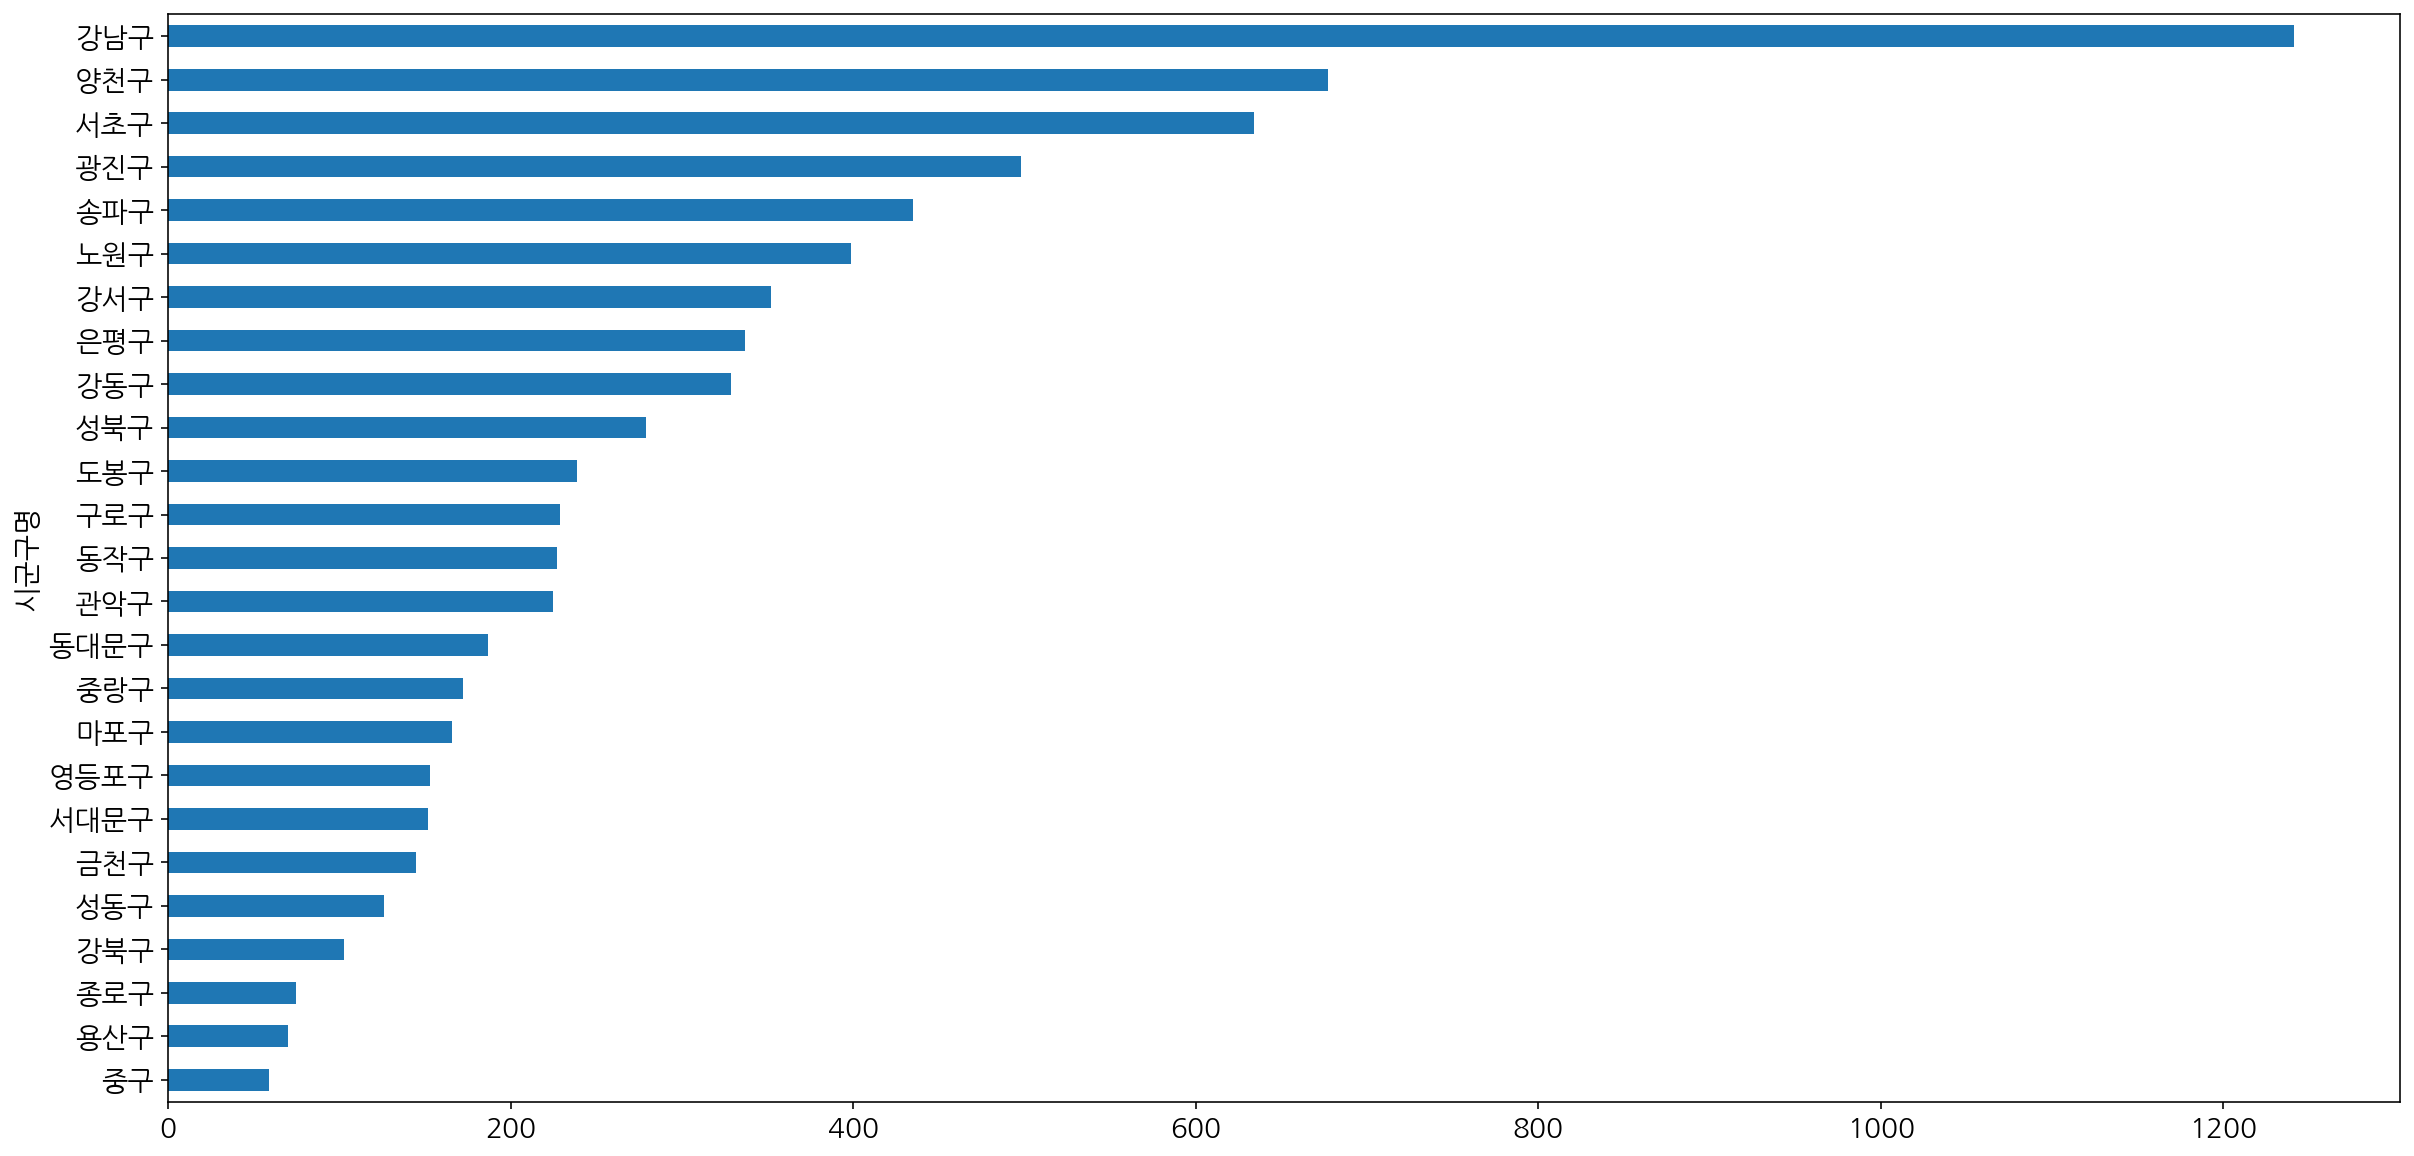

In [278]:
# 상권업종소분류명이 index 로 되어 있습니다.
# loc를 통해 index 값을 가져올 수 있습니다.
# 그룹화된 결과 중 "학원-입시" 데이터만 가져옵니다. 
g.loc["학원-입시"].sort_values().plot.barh(figsize=(20,10))

<AxesSubplot:xlabel='상권업종소분류명,시군구명'>

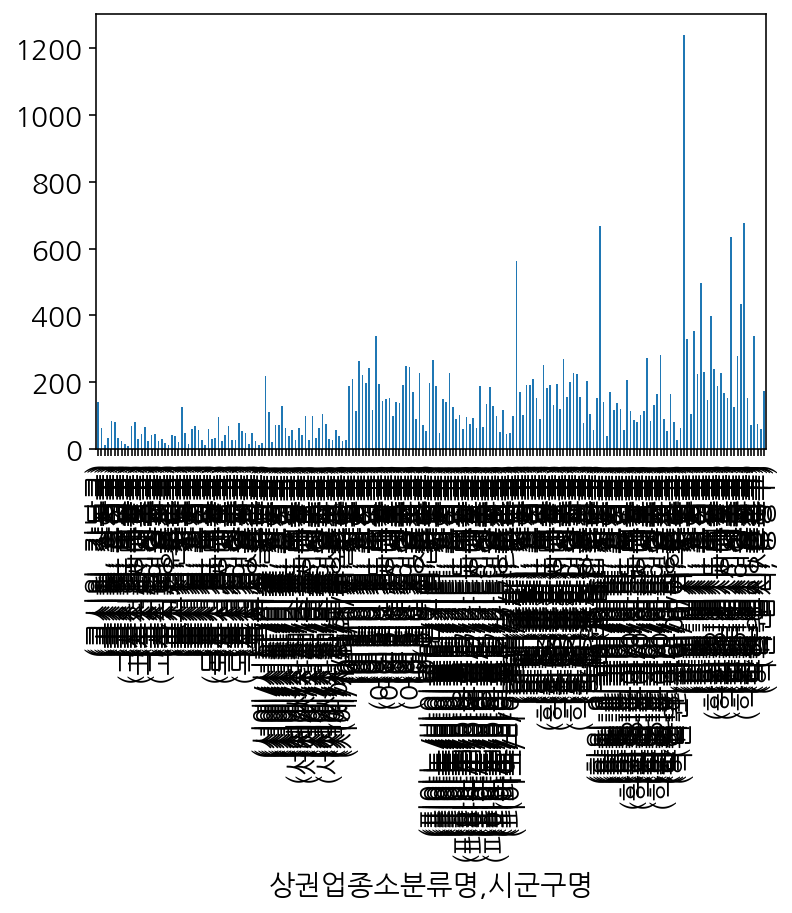

In [283]:
# 그룹화된 데이터를 시각화 하게 되면 멀티인덱스 값으로 표현이 되어 보기가 어렵습니다.
# 다음 셀부터 이 그래프를 개선해 봐요!

g.plot.bar()

### unstack() 이해하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html
<img src="https://pandas.pydata.org/docs/_images/reshaping_stack.png">
<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png">

In [437]:
g.unstack().iloc?

Object `iloc` not found.


In [ ]:
g.unstack().iloc

In [379]:
g.unstack().iloc

In [438]:
# 위에서 그룹화한 데이터를 unstack() 하고 iloc로 위에서 5개 왼쪽에서 5개만 서브셋을 봅니다.

g.unstack().iloc[:5,:5]

시군구명         강남구  강동구  강북구  강서구  관악구
상권업종소분류명                            
고시원          139   62   11   32   83
독서실          125   46   14   60   69
서예/서화/미술     219  110   19   70   72
어린이집         189  210  112  262  220
피아노/바이올린/기타  266  189   47  150  139

<AxesSubplot:ylabel='상권업종소분류명'>

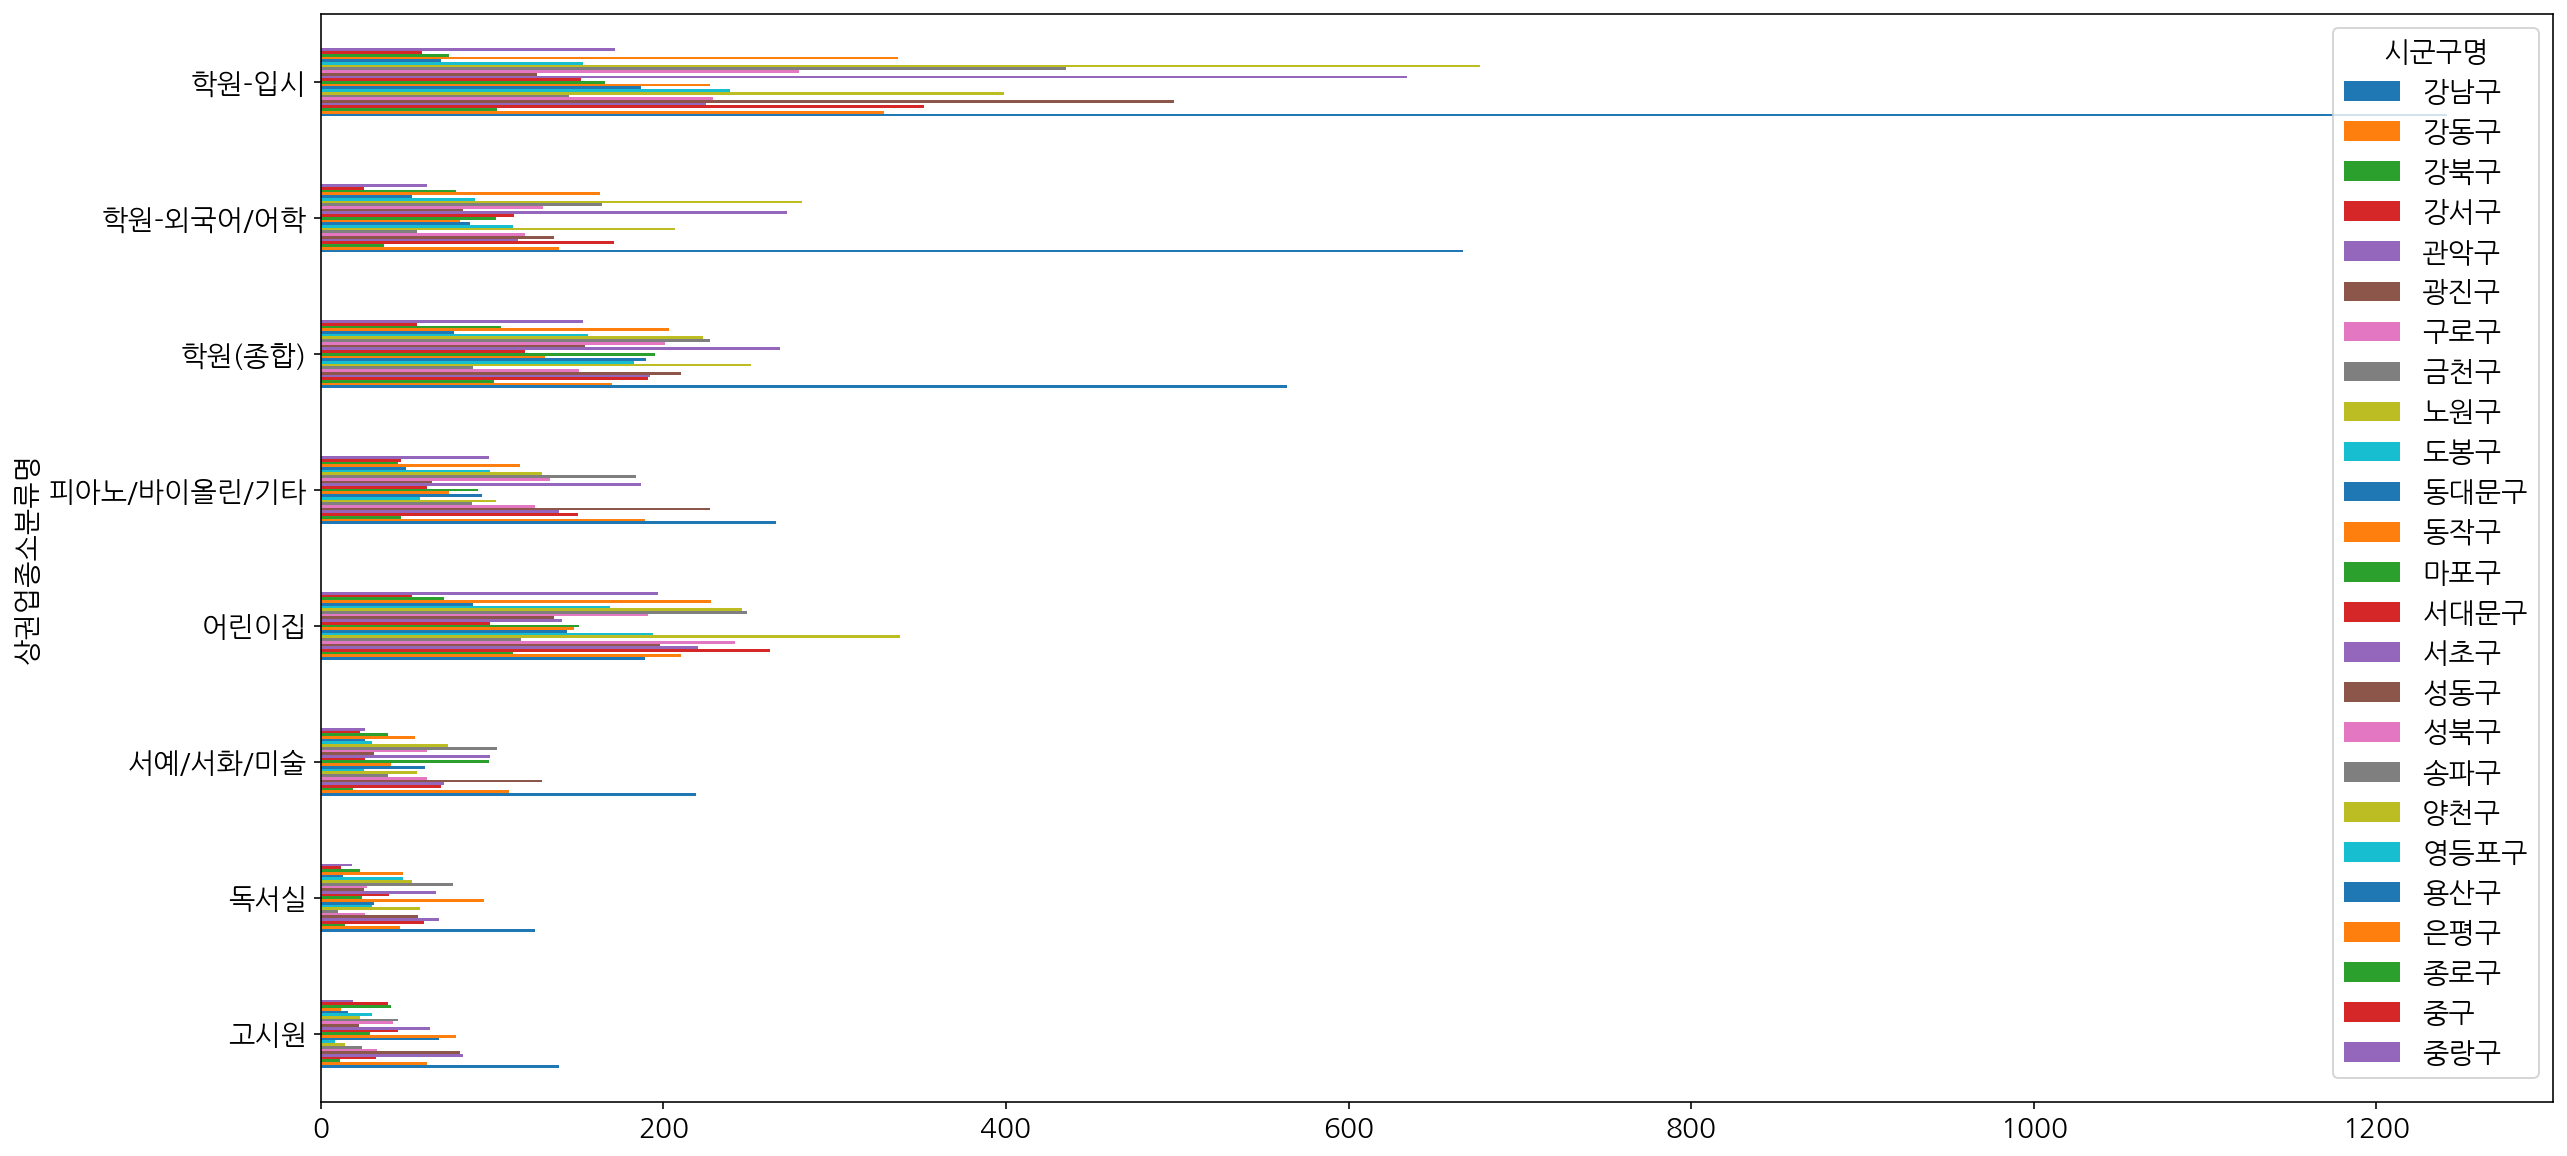

In [439]:
# 그룹화된 결과에 unstack 을 사용하면 마지막 인덱스 컬럼이 컬럼으로 바뀝니다.

g.unstack().plot.barh(figsize=(20,10))

<AxesSubplot:xlabel='시군구명'>

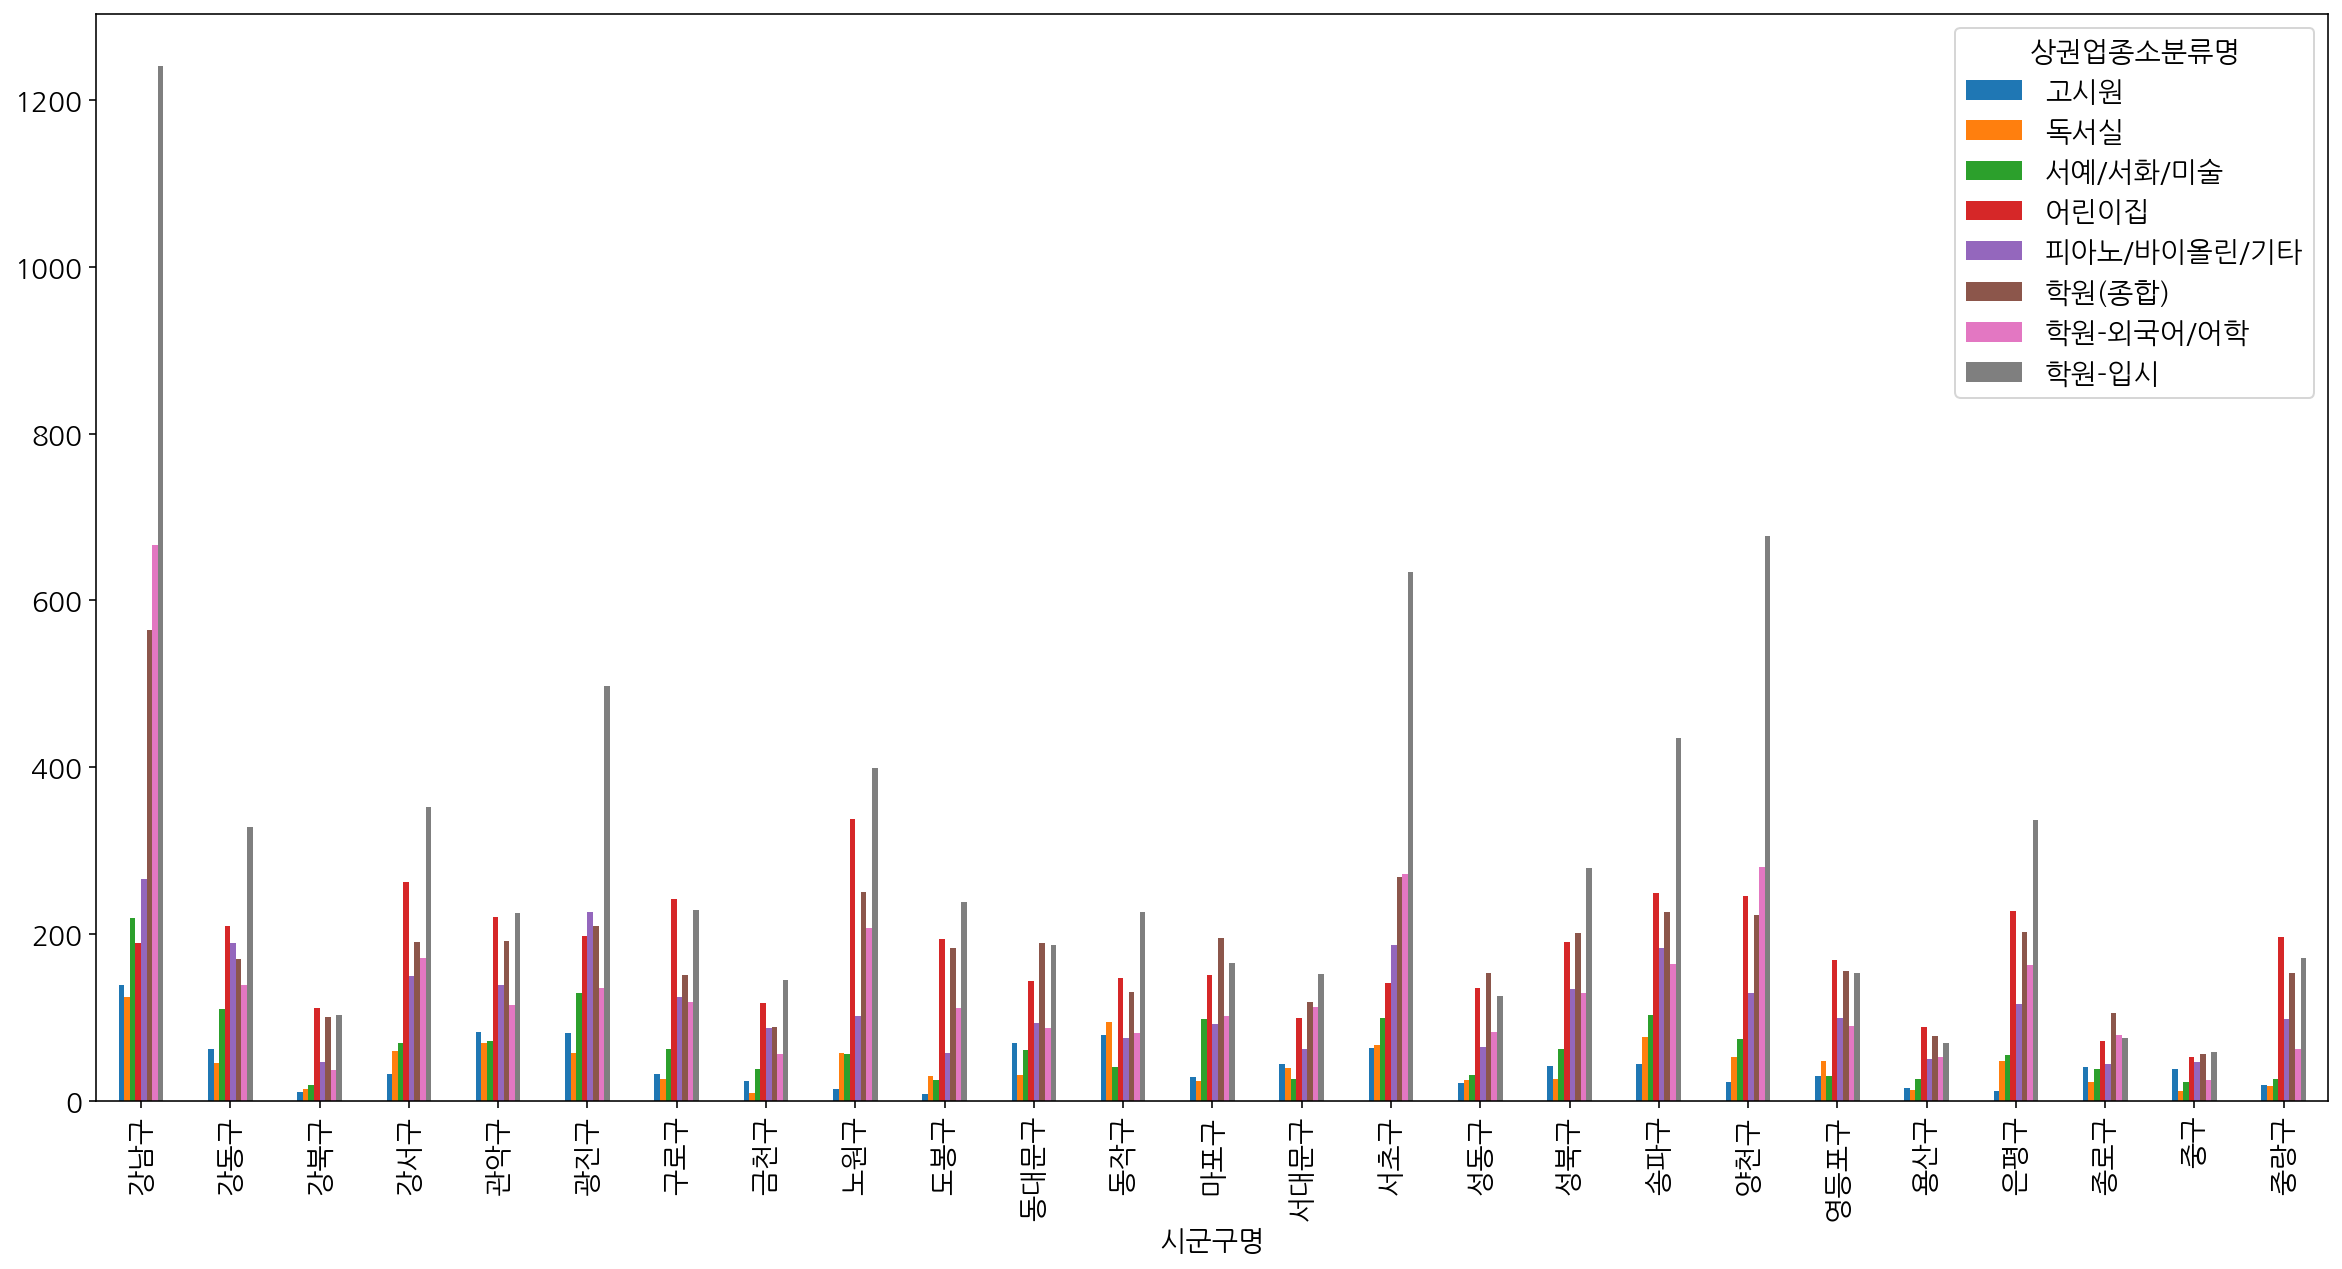

In [442]:
# 구별로 학원 수 시각화 하기 unstack() 값에 transpose 를 하면 행과 열이 바뀝니다.

g.unstack().T.plot.bar(figsize=(20,10))

In [443]:
# 그룹화 한 값의 인덱스를 출력해 봅니다.
g.index

MultiIndex([(  '고시원',  '강남구'),
            (  '고시원',  '강동구'),
            (  '고시원',  '강북구'),
            (  '고시원',  '강서구'),
            (  '고시원',  '관악구'),
            (  '고시원',  '광진구'),
            (  '고시원',  '구로구'),
            (  '고시원',  '금천구'),
            (  '고시원',  '노원구'),
            (  '고시원',  '도봉구'),
            ...
            ('학원-입시',  '성동구'),
            ('학원-입시',  '성북구'),
            ('학원-입시',  '송파구'),
            ('학원-입시',  '양천구'),
            ('학원-입시', '영등포구'),
            ('학원-입시',  '용산구'),
            ('학원-입시',  '은평구'),
            ('학원-입시',  '종로구'),
            ('학원-입시',   '중구'),
            ('학원-입시',  '중랑구')],
           names=['상권업종소분류명', '시군구명'], length=200)

In [444]:
# 멀티인덱스보다 컬럼으로 접근이 편하기 때문에 reset_index 를 통해 인덱스값을 컬럼으로 만들어 줍니다.
# "상호명" 컬럼은 "상호수" 이기 때문에 컬럼명을 변경해 줍니다.
t = g.reset_index()
t = t.rename(columns={"상호명":"상호수"})
t

상권업종소분류명 시군구명  상호수
0        고시원  강남구  139
1        고시원  강동구   62
2        고시원  강북구   11
3        고시원  강서구   32
4        고시원  관악구   83
..       ...  ...  ...
195    학원-입시  용산구   70
196    학원-입시  은평구  337
197    학원-입시  종로구   75
198    학원-입시   중구   59
199    학원-입시  중랑구  172

[200 rows x 3 columns]

### 같은 그래프를 seaborn 으로 그리기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

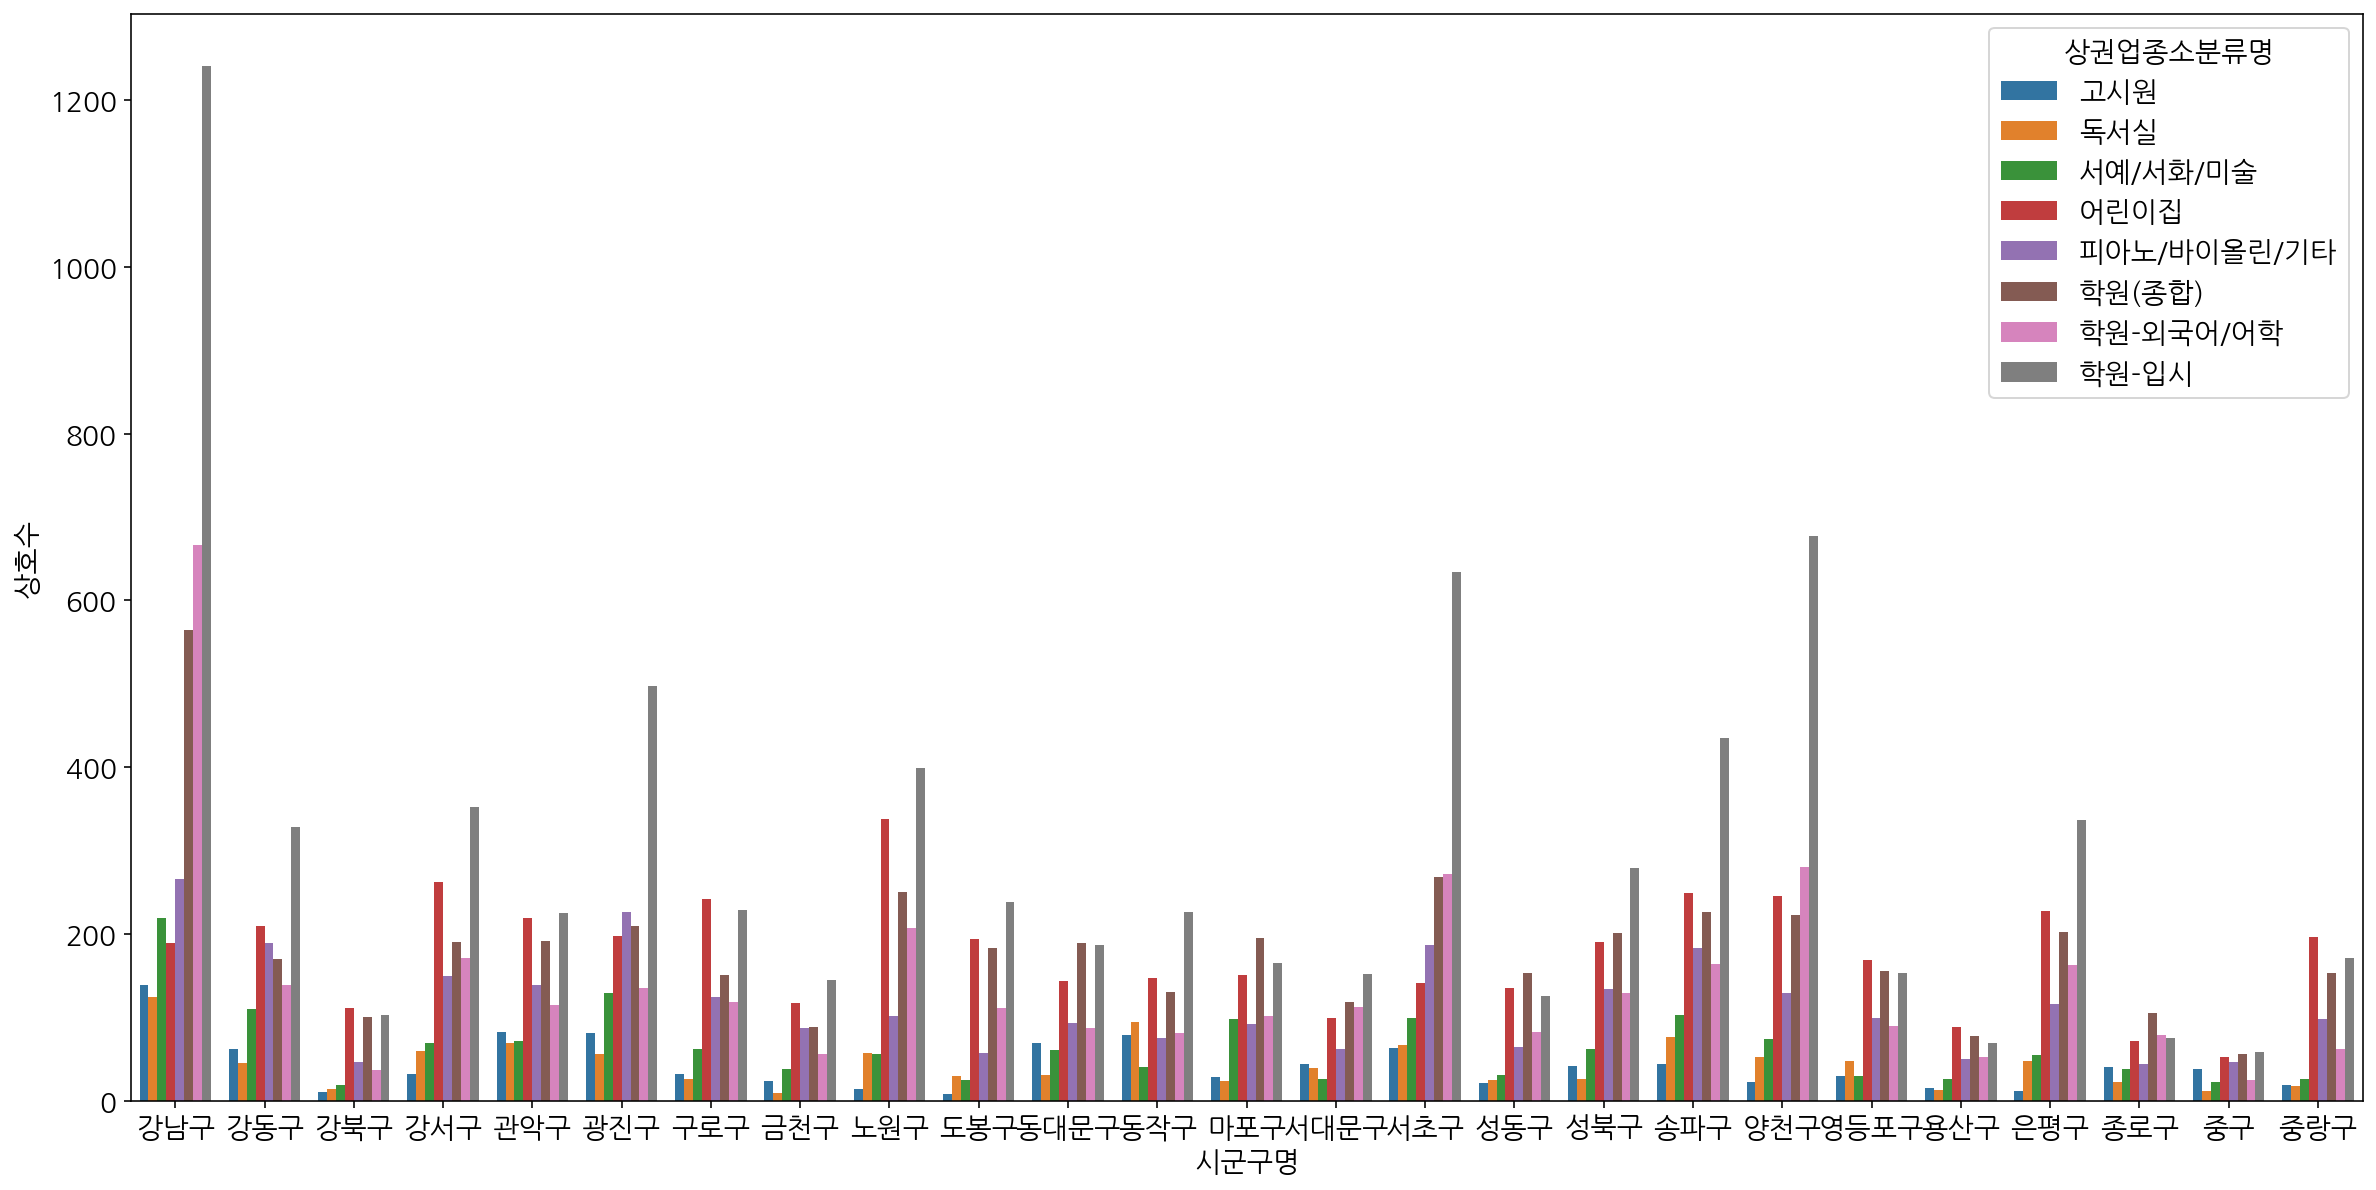

In [445]:
# x축에 시군구명을 y축에 상호수를 막대그래프로 그립니다. 
# 상권업종소분류명 으로 색상을 다르게 표현합니다.
plt.figure(figsize=(20,10))
sns.barplot(data=t , x="시군구명" , y="상호수" ,hue="상권업종소분류명")

<AxesSubplot:xlabel='상권업종소분류명', ylabel='상호수'>

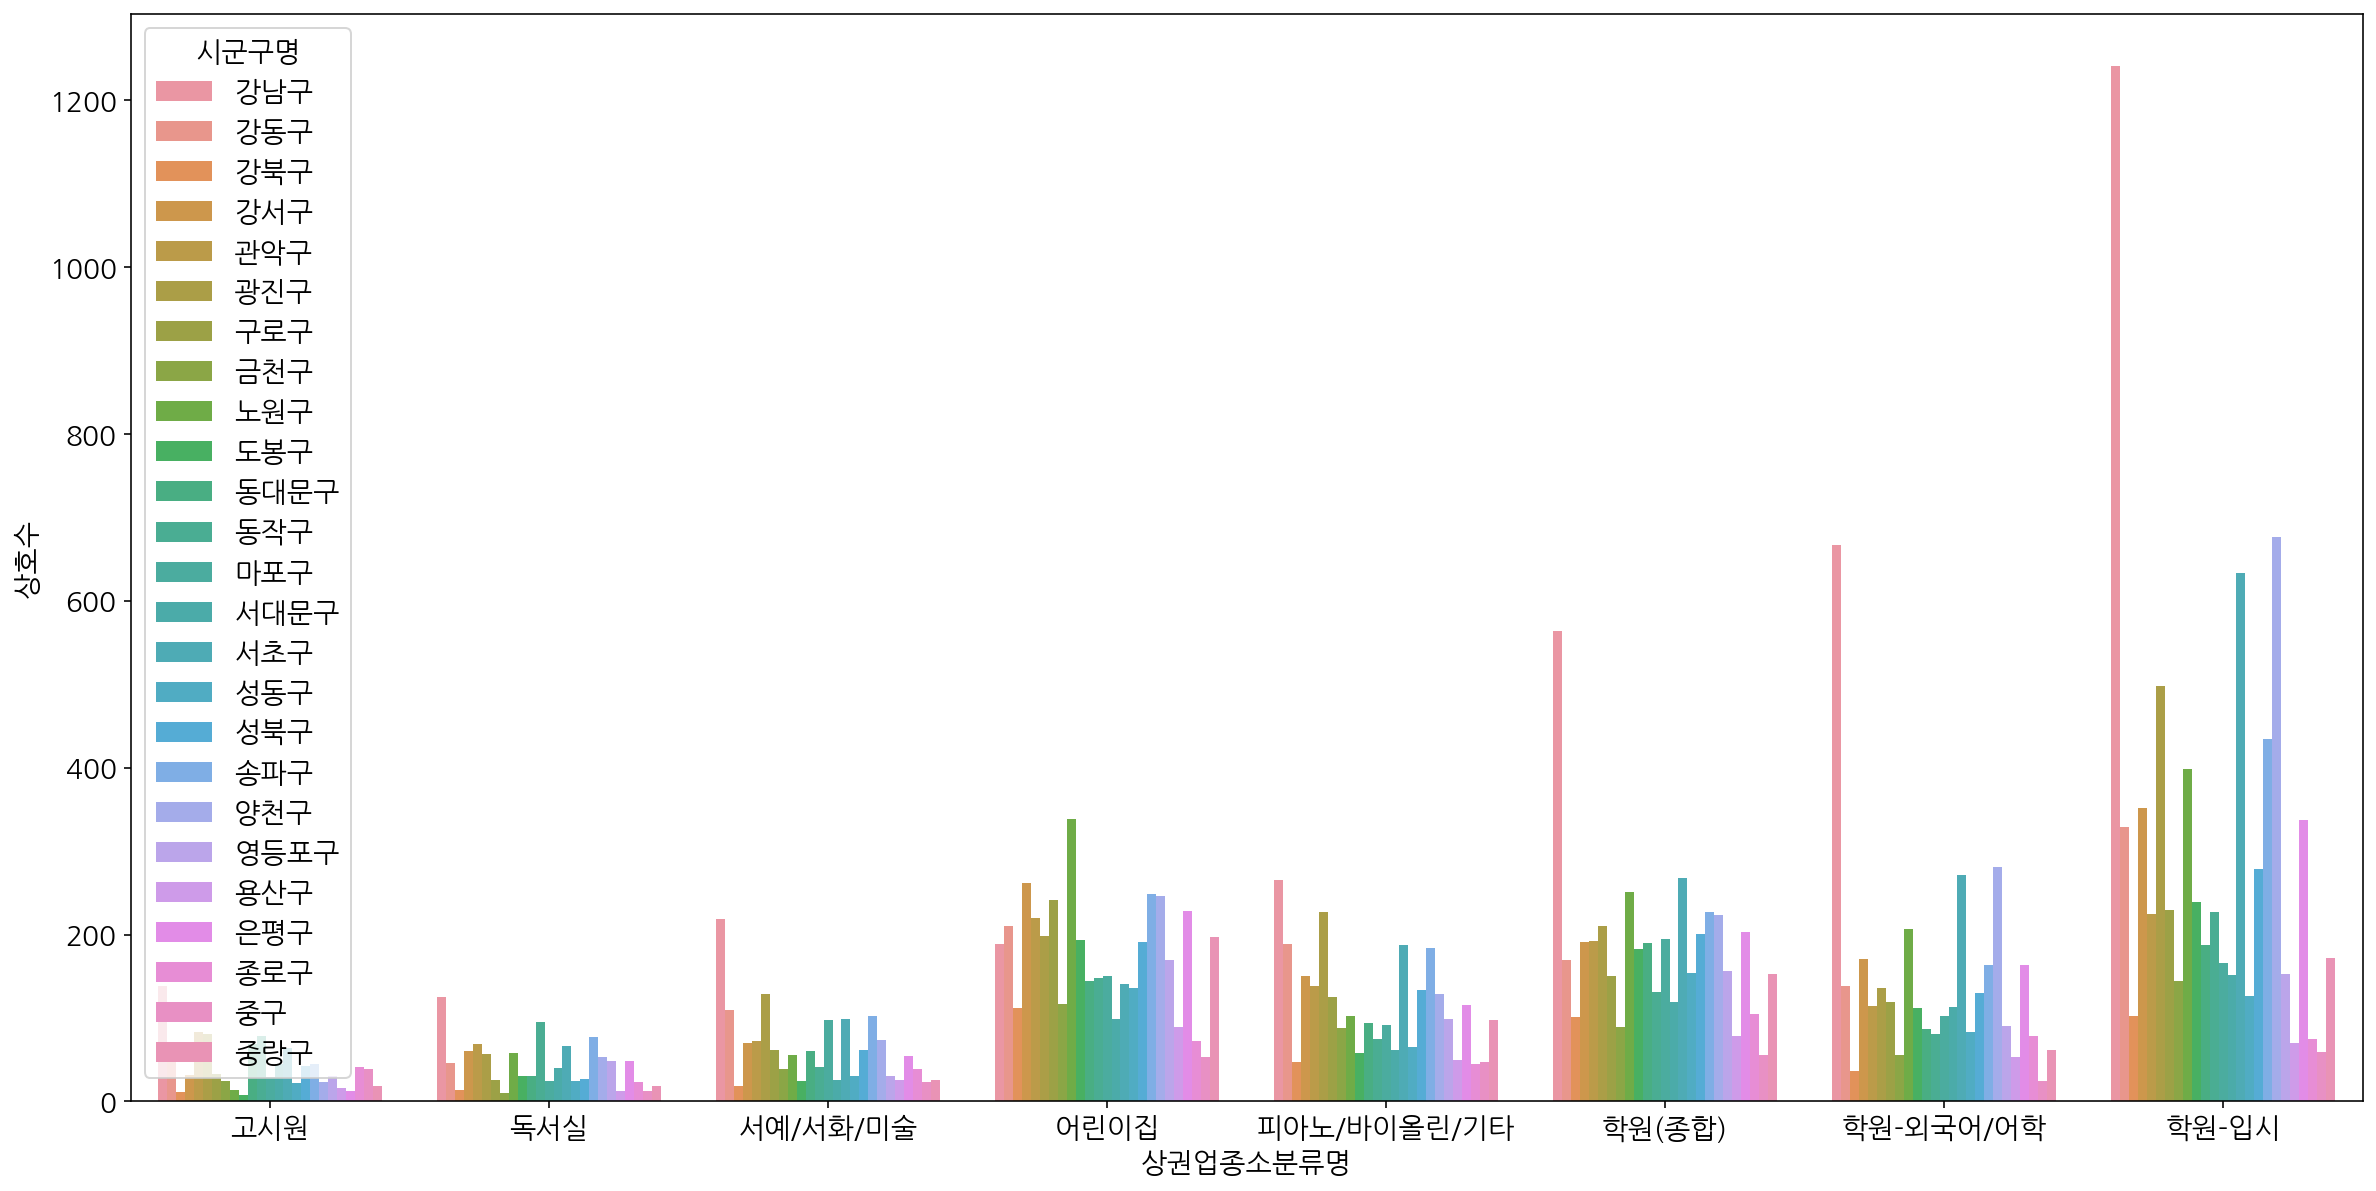

In [446]:
# x축에 상권업종소분류명을 y축에 상호수를 막대그래프로 그립니다. 
# 시군구명 으로 색상을 다르게 표현합니다.

plt.figure(figsize=(20,10))
sns.barplot(data=t , x="상권업종소분류명" , y="상호수" ,hue="시군구명")

(25, 3)


<AxesSubplot:xlabel='시군구명', ylabel='상호수'>

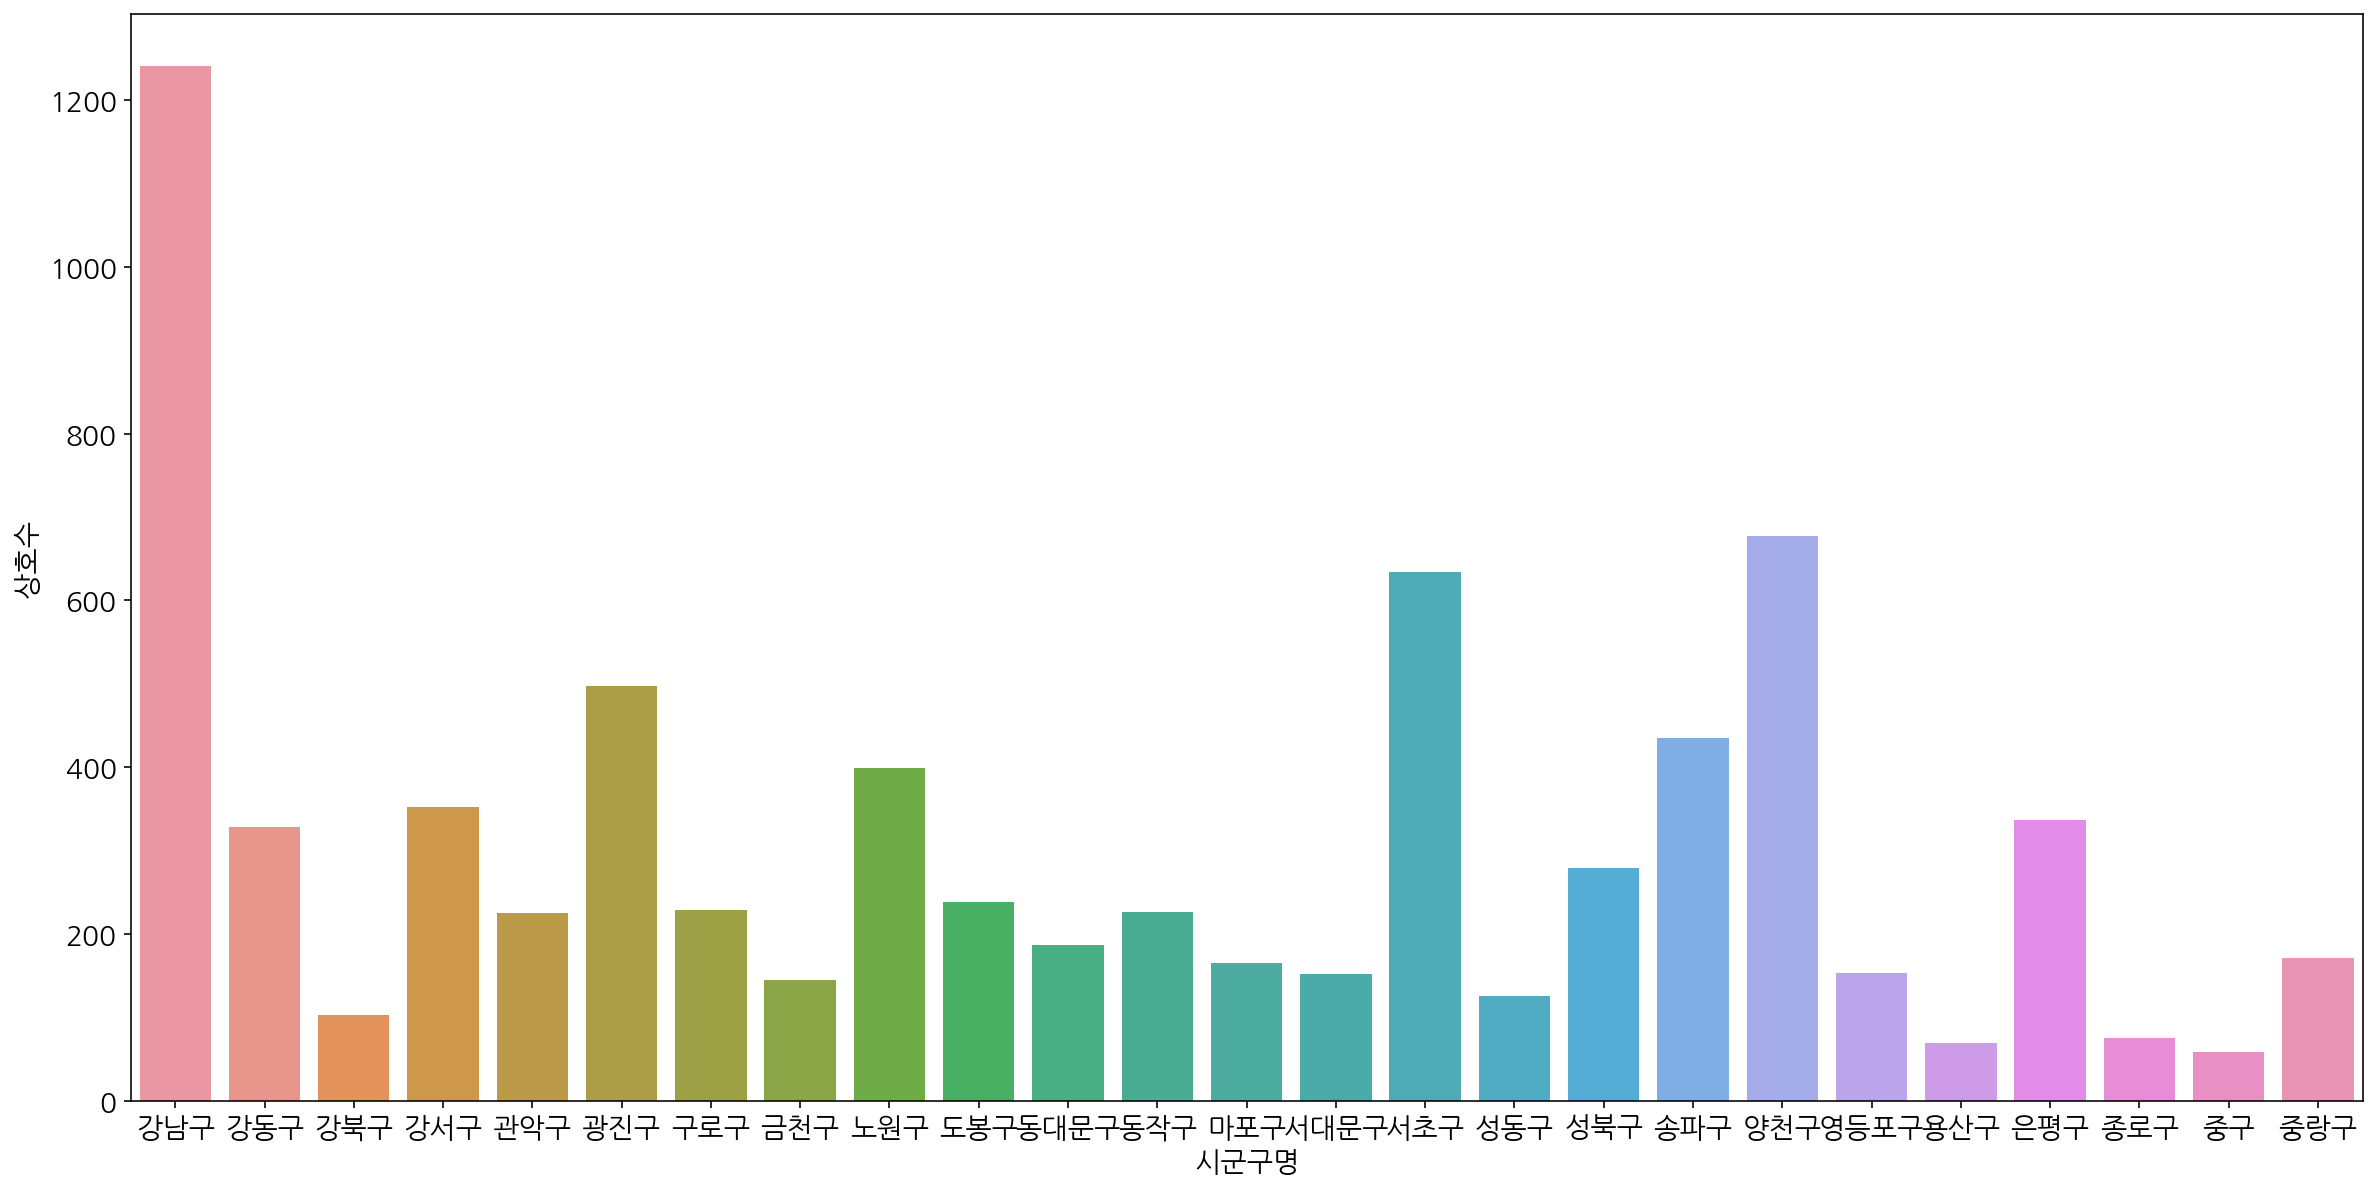

In [447]:
# "상권업종소분류명"이 "학원-입시" 인 서브셋만 가져와서 시각화 합니다.

academy_sub = t[t["상권업종소분류명"] == "학원-입시"].copy()
print(academy_sub.shape)
plt.figure(figsize=(20,10))
sns.barplot(data=academy_sub , x="시군구명" , y="상호수")

/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


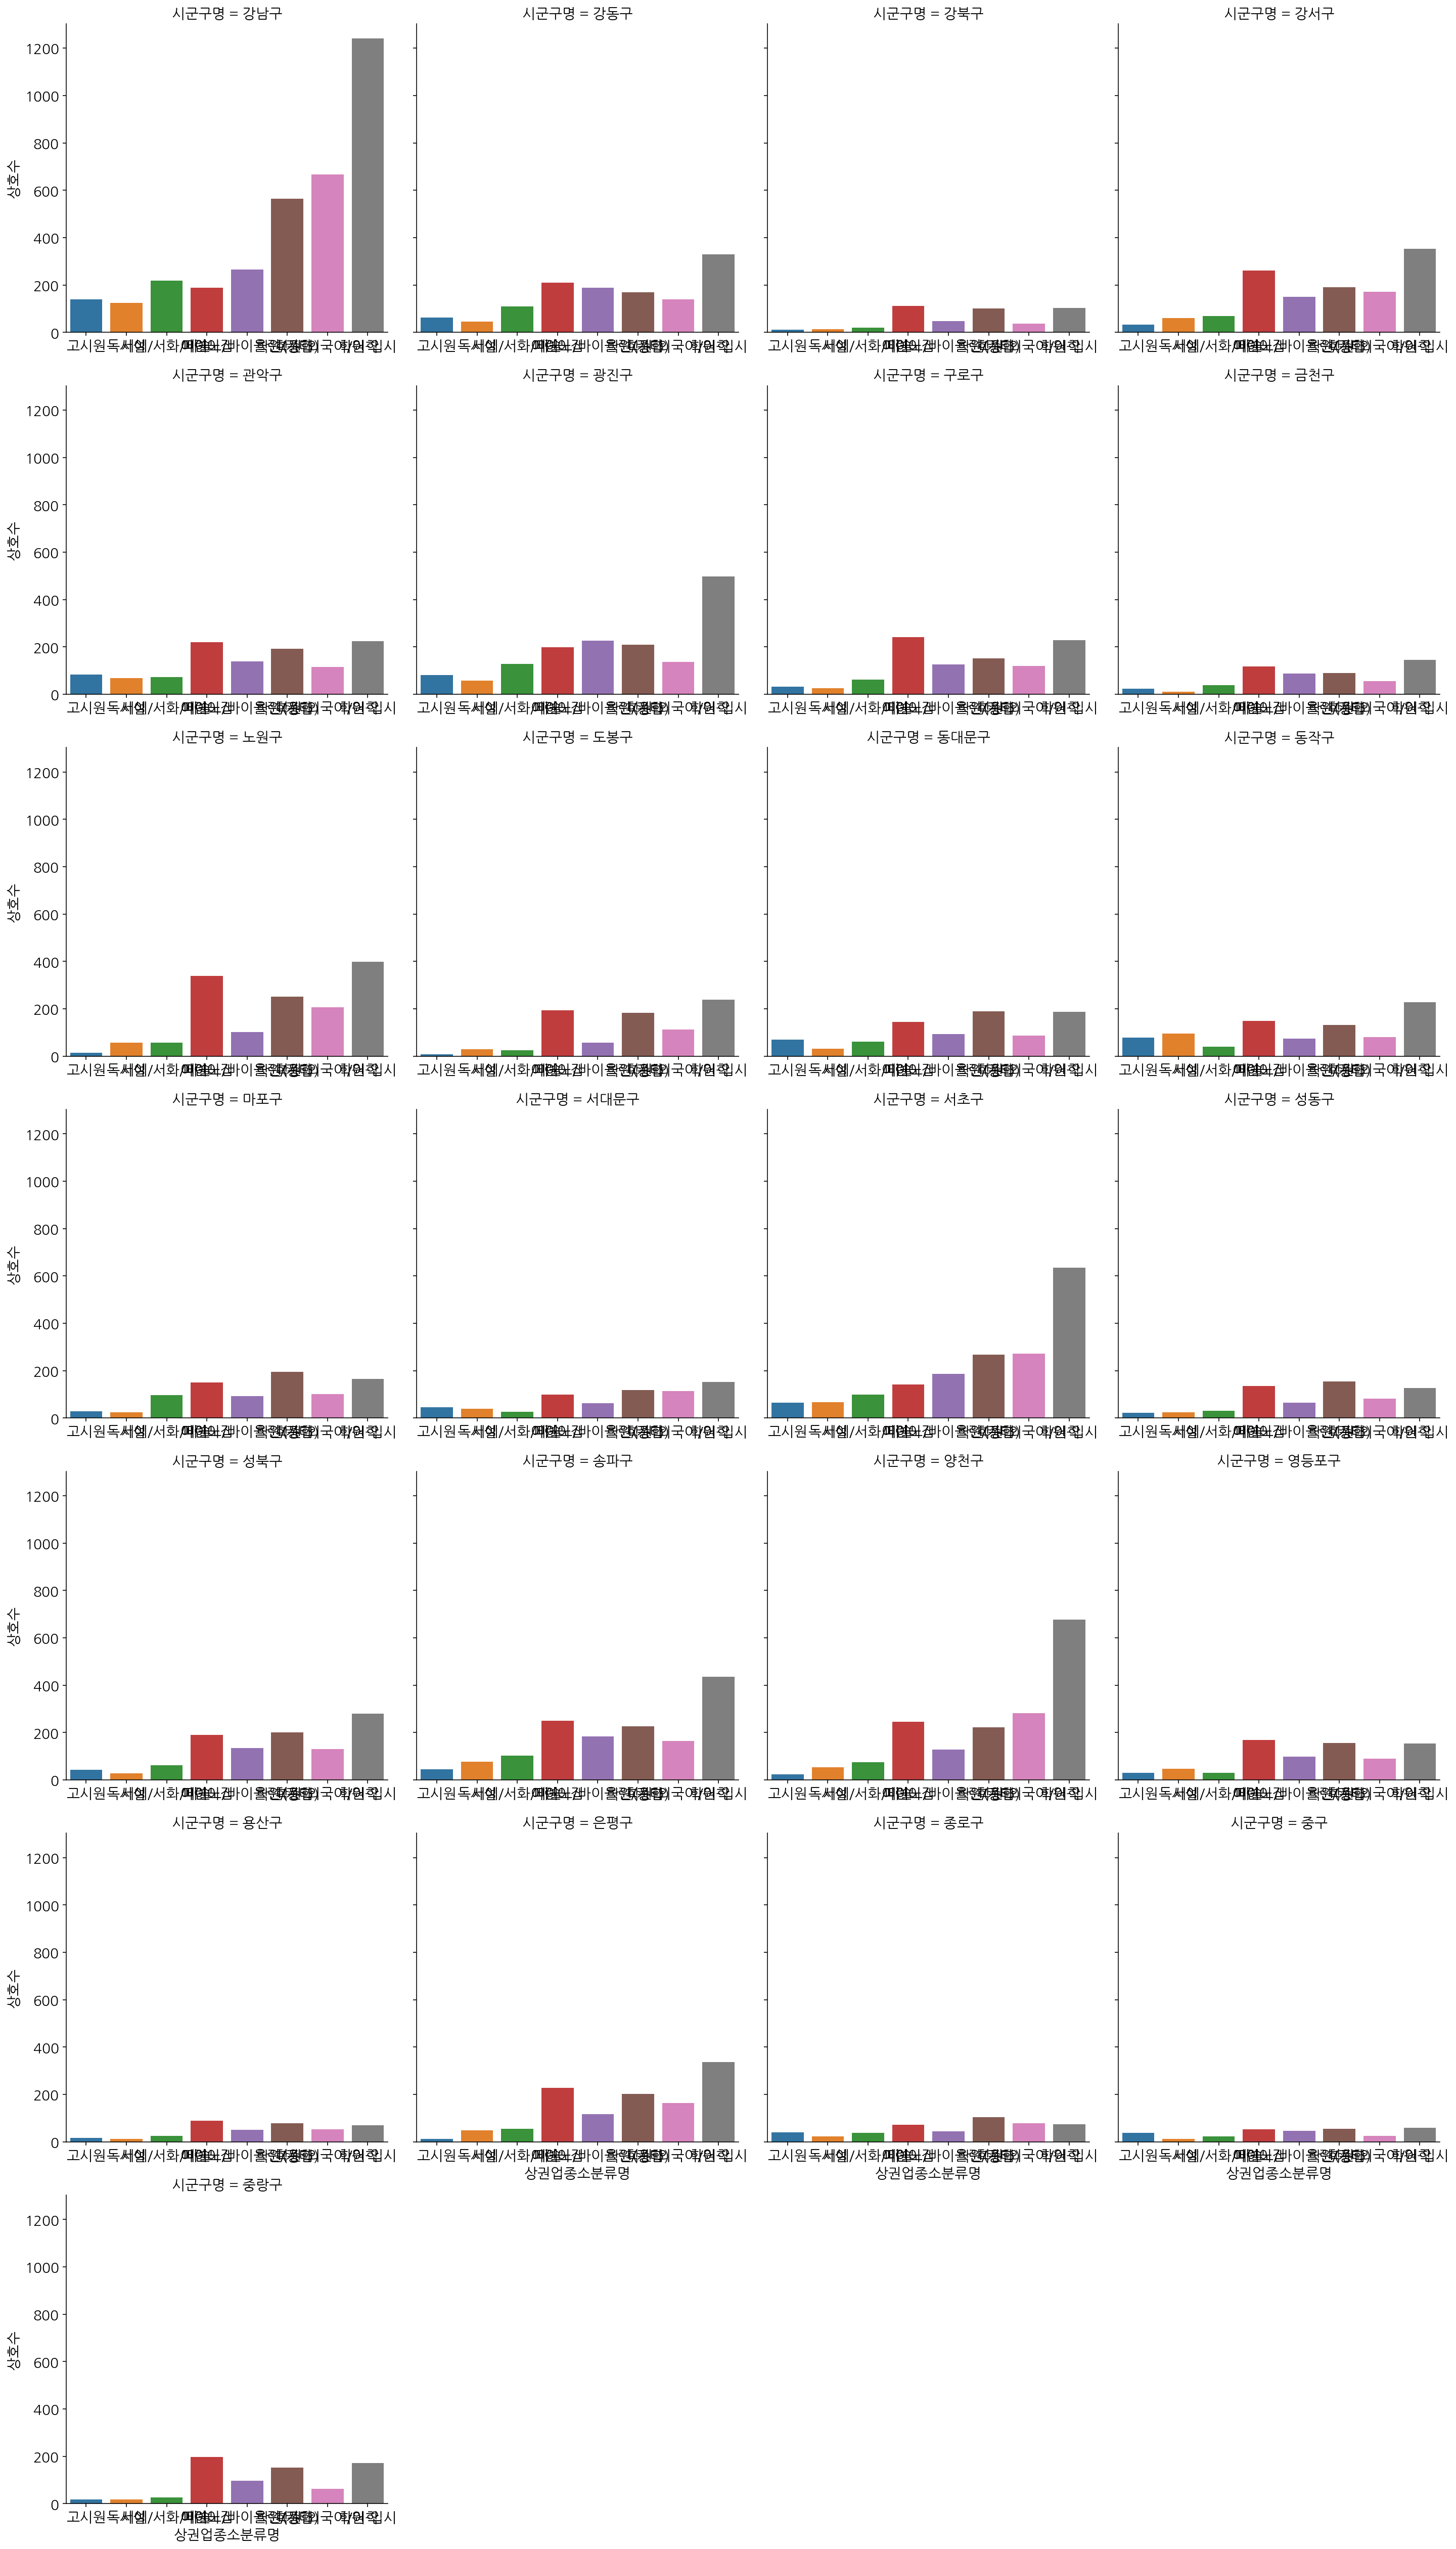

In [323]:
# catplot을 통해 서브플롯을 그립니다.
sns.catplot(data=t , x="상권업종소분류명" , y="상호수",kind="bar",col="시군구명",col_wrap=4, sharex=False)

### 경도와 위도를 scatterplot 으로 표현하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

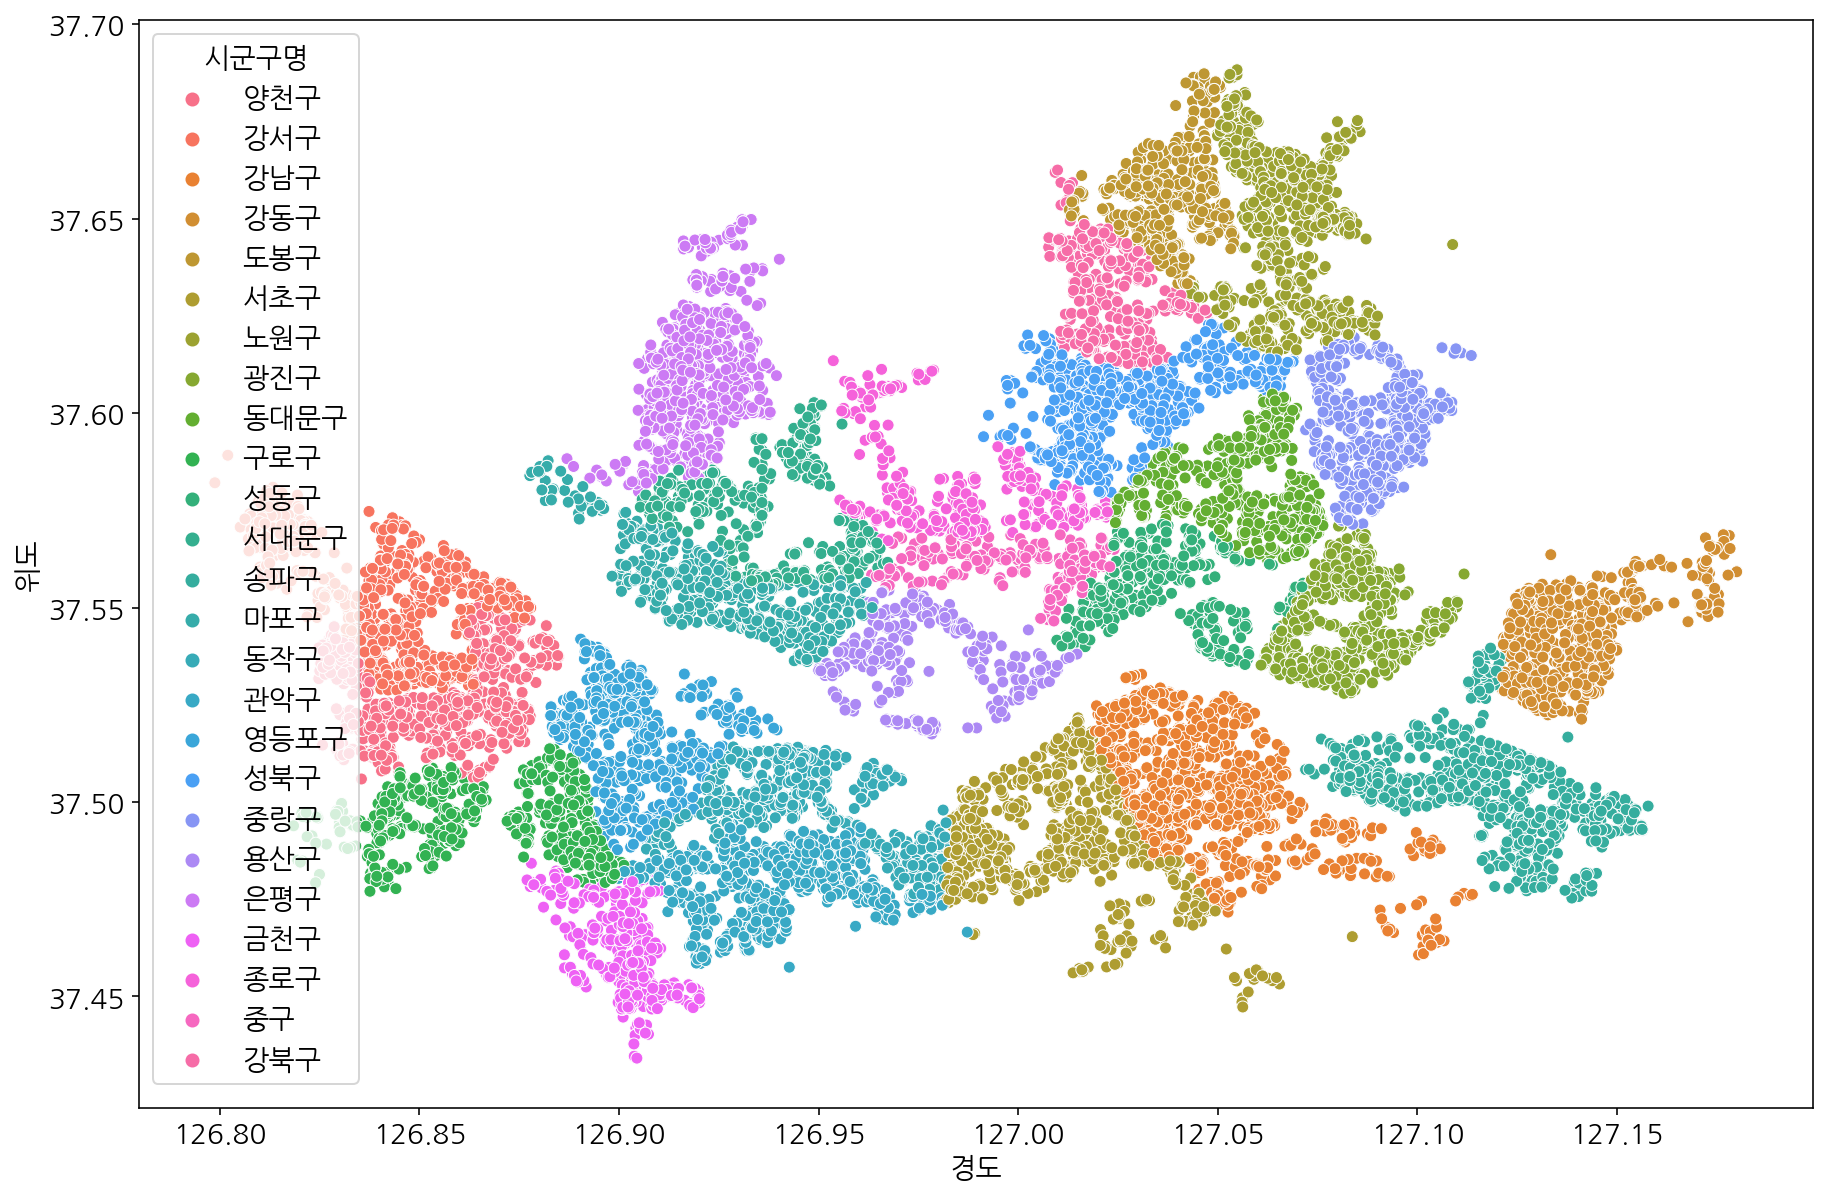

In [448]:
# scatterplot 으로 경도와 위도를 표현하고 시군구명으로 색상을 다르게 표현합니다.
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected , x="경도" , y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

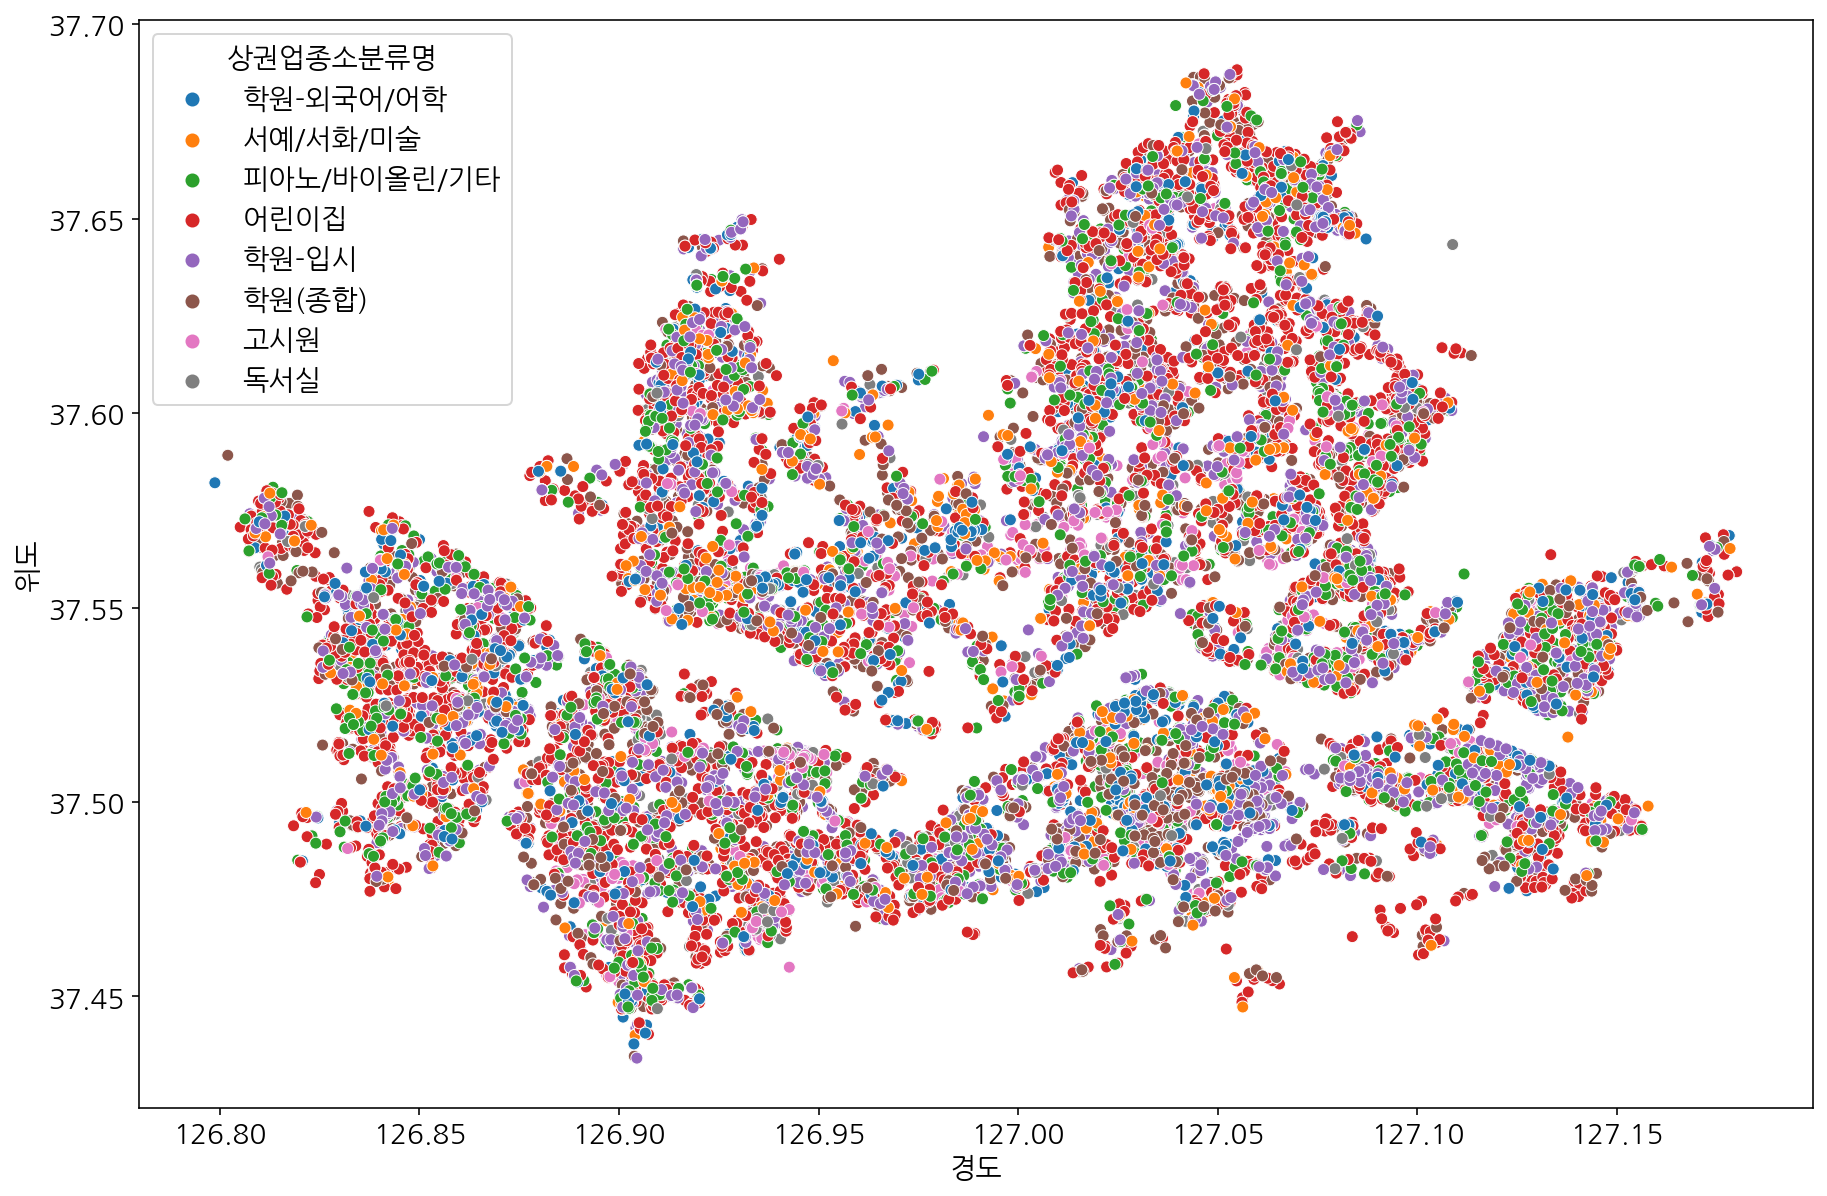

In [449]:
# scatterplot 으로 경도와 위도를 표현하고 상권업종소분류명으로 색상을 다르게 표현합니다.

plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected , x="경도" , y="위도", hue="상권업종소분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

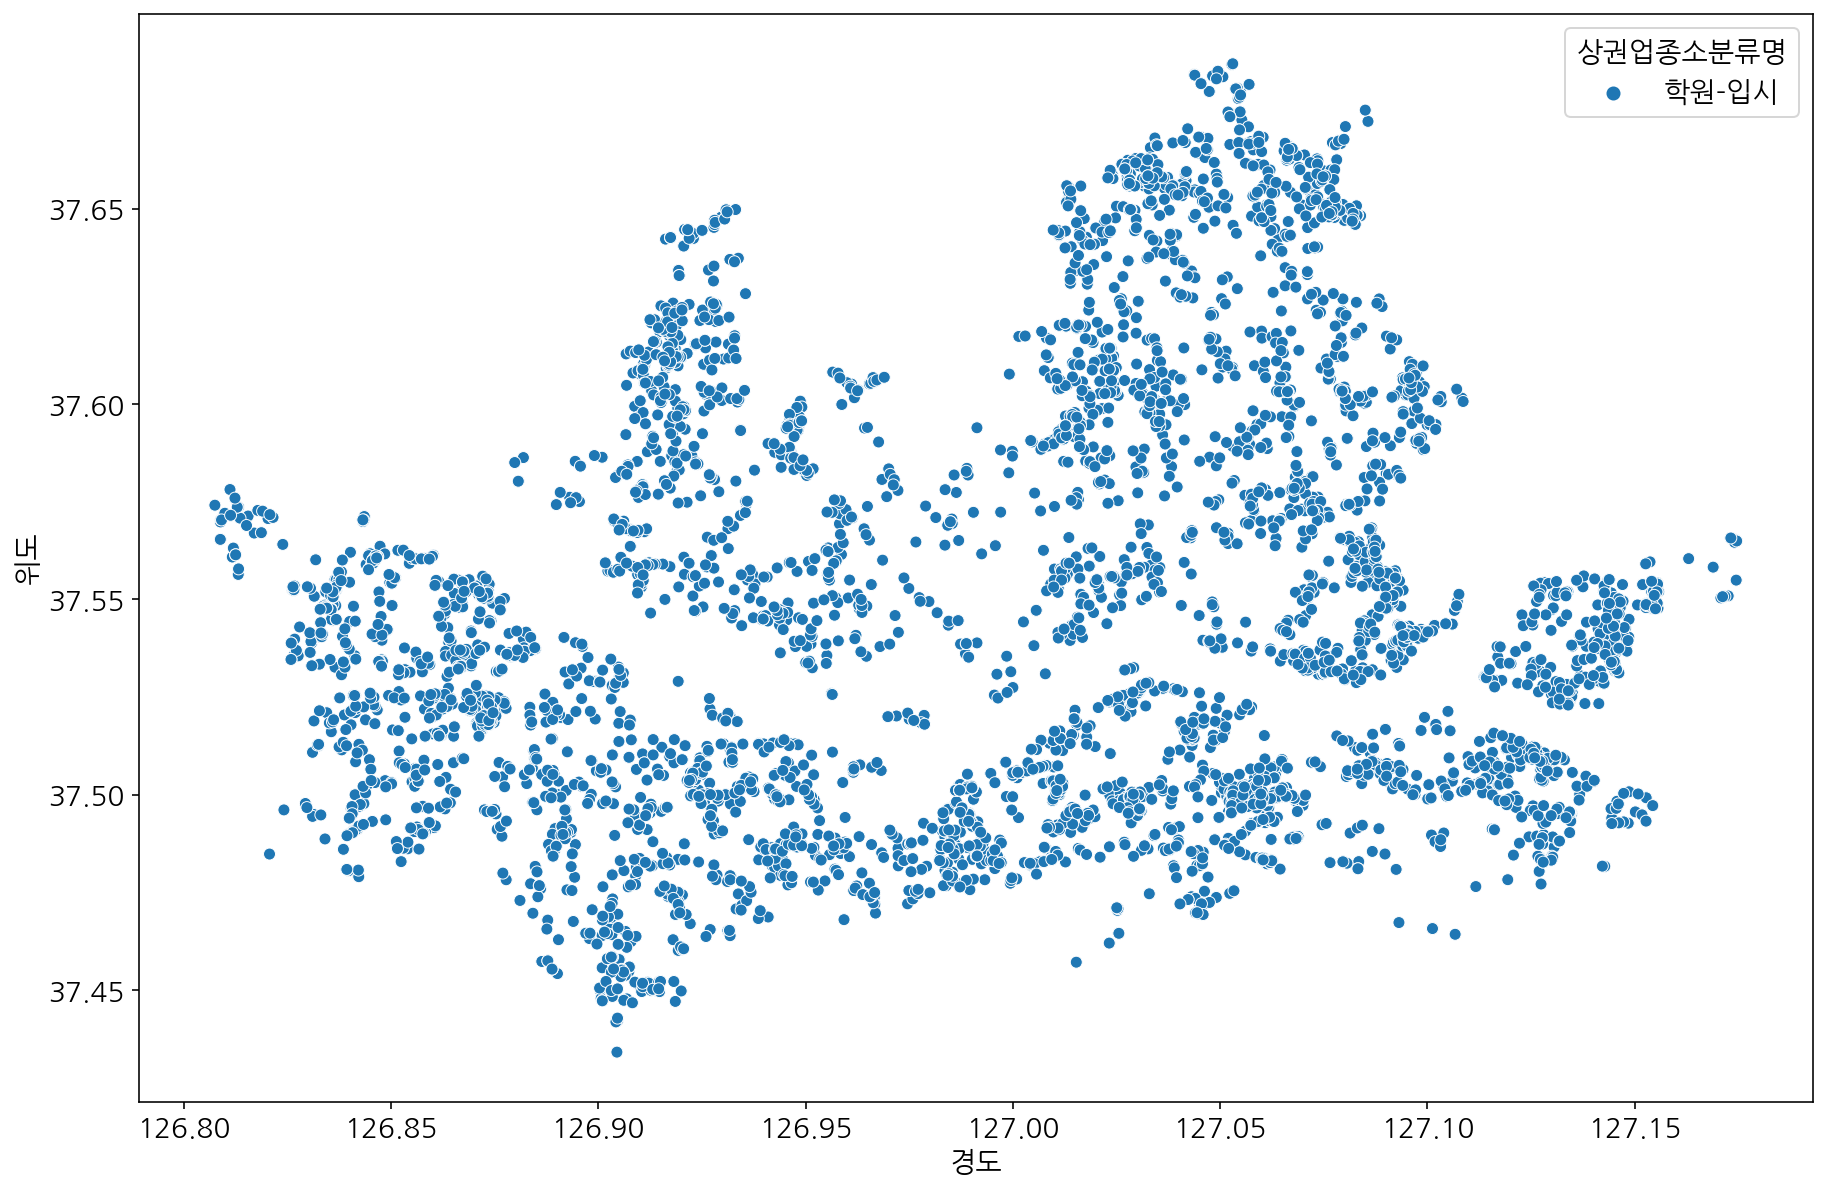

In [450]:
# "상권업종소분류명"이 "학원-입시" 인 데이터만 그려봅니다.
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"] =="학원-입시"]  
                , x="경도" , y="위도", hue="상권업종소분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

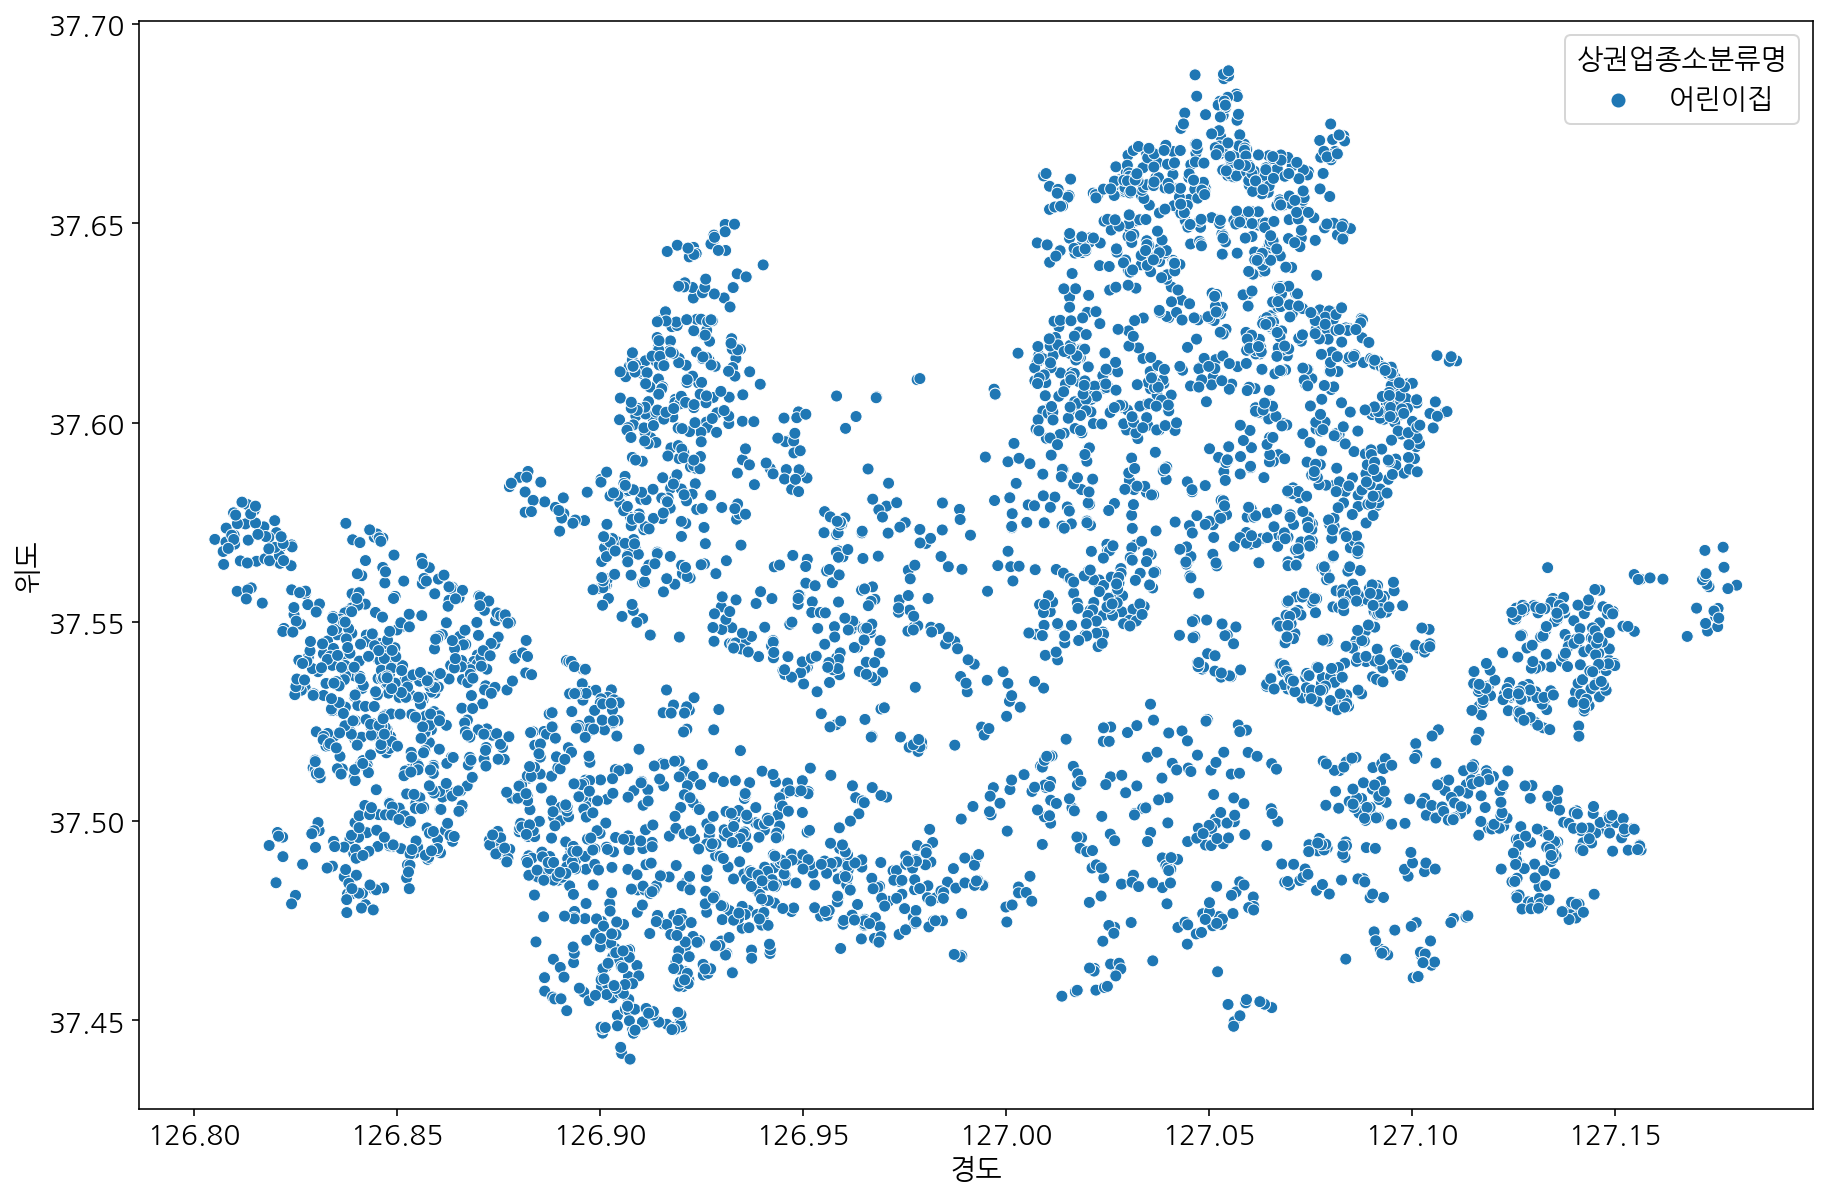

In [451]:
# "상권업종소분류명"이 "어린이집" 인 데이터만 그려봅니다.
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"] =="어린이집"]  
                , x="경도" , y="위도", hue="상권업종소분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

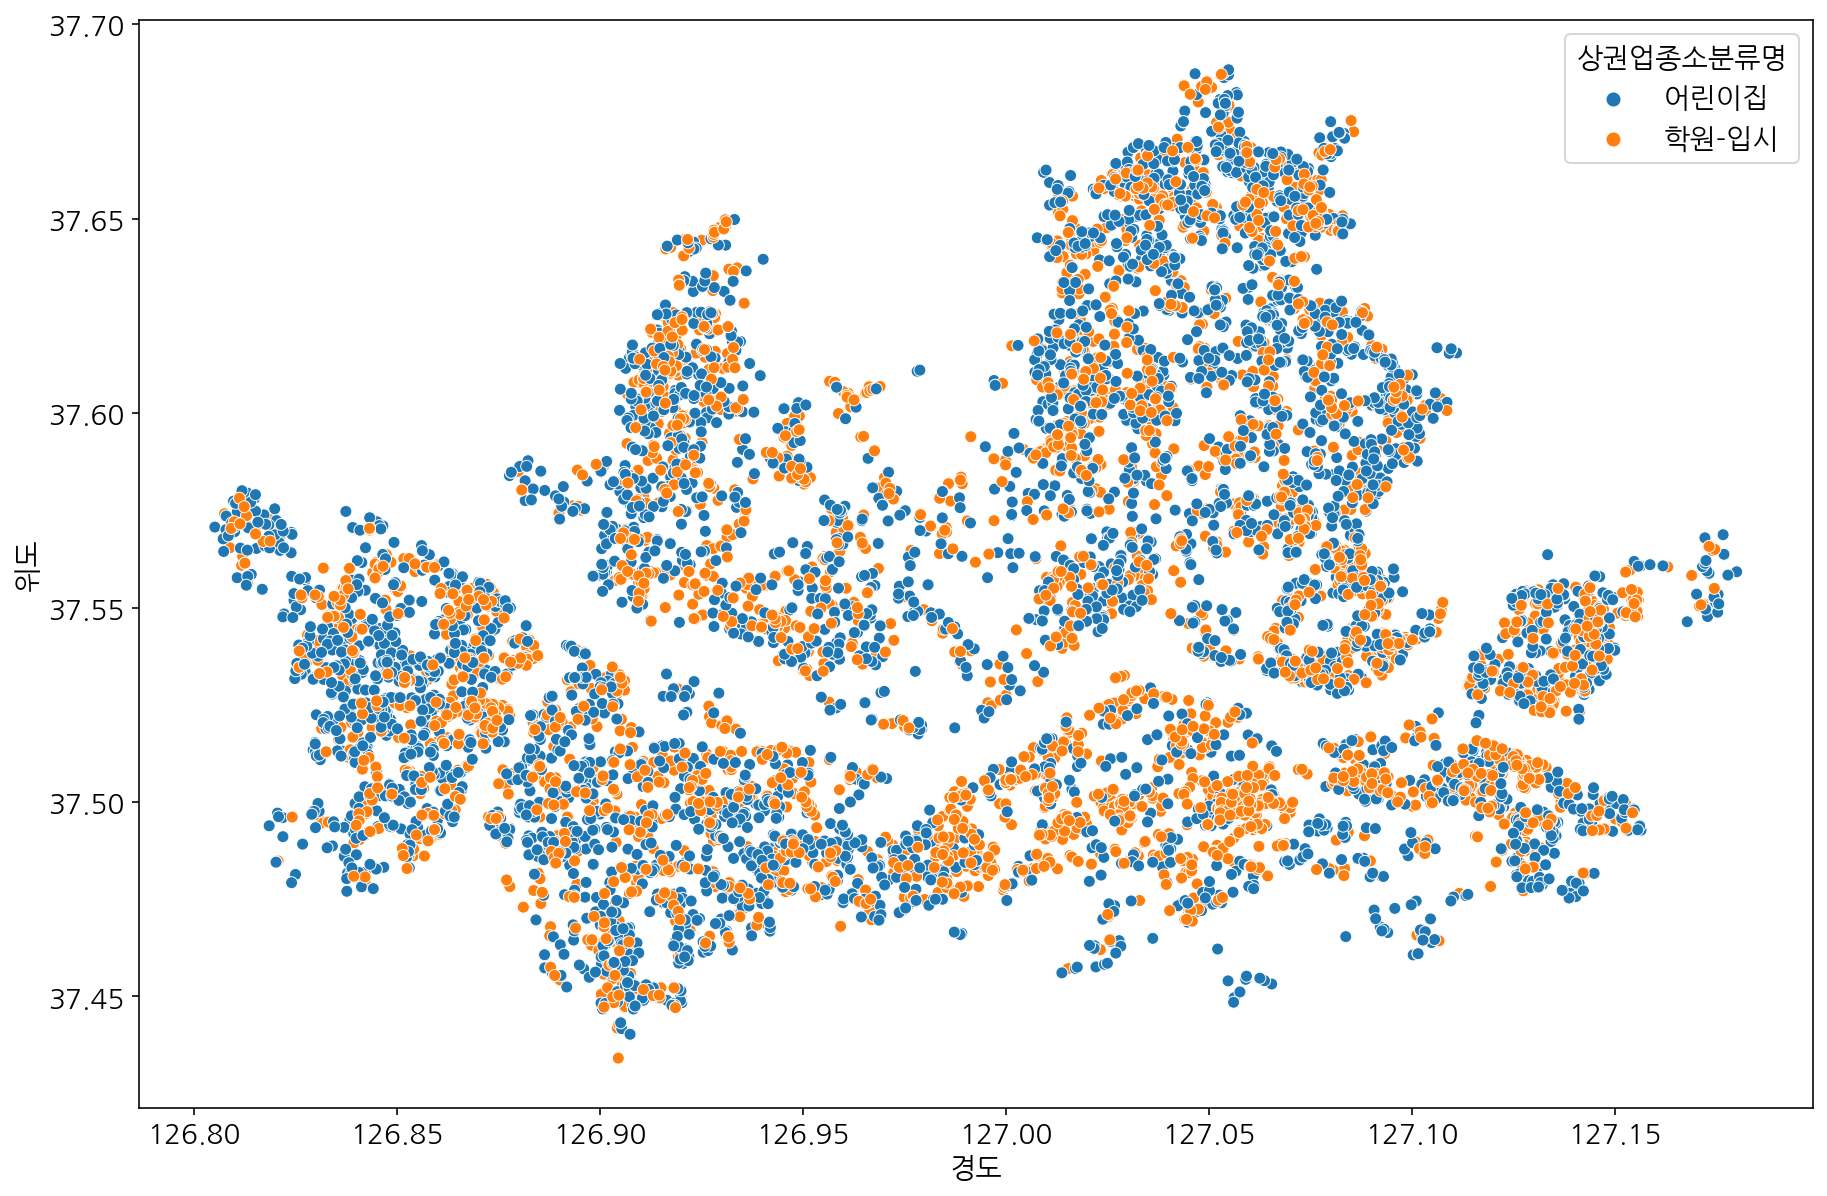

In [452]:
# 어린이집과 학원-입시를 비교해 봅니다.

plt.figure(figsize=(15,10))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"].isin(["학원-입시","어린이집"])]  
                , x="경도" , y="위도", hue="상권업종소분류명")


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
* 예제목록 : http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* Quickstart : https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb

In [453]:
# 위에서 그렸던 어린이집과 학원-입시에 대한 상호 데이터를 지도에 시각화 해봅니다.
import folium

In [454]:
# 경도와 위도의 평균을 구해서 long, lat 변수에 담습니다.
long= df_academy_selected["경도"].mean()
lat= df_academy_selected["위도"].mean()


In [455]:
df_m = df_academy_selected[df_academy_selected["상권업종소분류명"].isin(["학원-입시","어린이집"])].copy()
df_m = df_m.sample(1000)
df_m.shape

(1000, 16)

In [456]:
df_m.iloc[0]

상호명                   레벨업영수보습학원
상권업종대분류명                  학문/교육
상권업종중분류명              학원-보습교습입시
상권업종소분류명                  학원-입시
시도명                       서울특별시
시군구명                        송파구
행정동명                       송파2동
법정동명                        송파동
대지구분명                        대지
지번본번지                       164
지번주소        서울특별시 송파구 송파동 164-9
도로명            서울특별시 송파구 오금로32길
건물본번지                        50
도로명주소       서울특별시 송파구 오금로32길 50
경도                      127.117
위도                      37.5027
Name: 215099, dtype: object

In [460]:
m = folium.Map(location=[lat, long],zoom_start=12 )
for i in df_m.index[:100]:
    tooltip = df_m.loc[i, "상호명"]  + "+" + df_m.loc[i, "도로명주소"]
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]
    folium.CircleMarker([lat, long], tooltip=tooltip, radius=3 ).add_to(m)
m

In [461]:
m.save('index.html')

In [462]:
df_academy_selected.to_csv("test.csv", mode='w')

In [2]:
# "상권업종소분류명"에 "어린이집", "학원-입시"가 들어가는 데이터만 isin을 통해 가져옵니다.



In [3]:
# folium 으로 Marker 를 지도로 표시해 봅니다.



In [4]:
# html 파일로 저장해 봅니다.


In [5]:
# loc를 통해 특정 상호명을 접근해 봅니다.



In [6]:
# index 만 가져옵니다.



In [7]:
# for문으로 데이터프레임을 순회하며 원하는 값을 가져옵니다.



In [8]:
# 위에서 작성해본 for문을 활용해 CircleMarker 로 표현해 봅니다.

